In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext rpy2.ipython

# import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os, sys
import pandas as pd
# import scipy.stats as stats
# from sklearn.metrics.pairwise import cosine_similarity

sys.path.insert(0, 'src')
import utils
# import visualizations
import analysis

In [2]:
# n_per_condition = 121
# date = '11142024'
# data_id = 'pilot_v3'
# grouping_version = 'absolute_study4' # Whether to use absolute or relative for grouping Colombatto statements
conditions = ["Baseline", "Mechanistic", "Functional", "Intentional"]

baseline_df_path = '../data/baseline_raw_data.csv'
experimental_df_path = '../data/experimental_raw_data.csv'
# baseline_df_path = 'data/{}_{}/{}_baseline.csv'.format(data_id, date, date)
# experimental_df_path = 'data/{}_{}/{}_experimental.csv'.format(data_id, date, date)

baseline_df = utils.read_file(baseline_df_path)
experimental_df = utils.read_file(experimental_df_path)

# Make 'Finished' column all upper case and select data rows that are completed
baseline_df['Finished'] = baseline_df['Finished'].str.upper()
experimental_df['Finished'] = experimental_df['Finished'].str.upper()

# Only select finished rows
baseline_df = baseline_df[baseline_df['Finished'] == 'TRUE']
experimental_df = experimental_df[experimental_df['Finished'] == 'TRUE']
# Merge baseline and experimental conditions data
df = pd.merge(baseline_df, experimental_df, how='outer')

utils.informal_log("In total: {} rows".format(len(df)))

# Print # rows in each condition
utils.informal_log("Baseline: {} rows".format(len(baseline_df)))
utils.informal_log("Mechanistic: {} rows".format(len(experimental_df[experimental_df['CONDITION'] == 'Mechanistic'])))
utils.informal_log("Functional: {} rows".format(len(experimental_df[experimental_df['CONDITION'] == 'Functional'])))
utils.informal_log("Intentional: {} rows".format(len(experimental_df[experimental_df['CONDITION'] == 'Intentional'])))
                   

# assert len(baseline_df) == n_per_condition, "Expected {} rows in baseline dataframe, received {}".format(n_per_condition, len(baseline_df))
# assert len(experimental_df) == n_per_condition * 3, "Expected {} rows in experimental dataframe, received {}".format(n_per_condition * 3, len(experimental_df))

[0421_171559] In total: 489 rows
[0421_171559] Baseline: 124 rows
[0421_171559] Mechanistic: 121 rows
[0421_171559] Functional: 122 rows
[0421_171559] Intentional: 122 rows


### Make save_dirs

In [16]:
# Exclusion parameters
# min_n_responses = None
min_survey_time = round(80 / 60, 4) # ~80 seconds
min_median_per_page_time = round(1 / 60, 4) # ~1 second
# exclude_high_leverage = False
# manual_exclusions = None
post_attention_check = True

'''
Commonly used Paths/Items
'''
PATH_TO_ROOT = '..'
overwrite = False
items_path = os.path.join(PATH_TO_ROOT, 'data/mental_capacity_items.txt')
categories_path = os.path.join(PATH_TO_ROOT, 'data/category_groupings.json')
# categories_path = 'dependent_variables/groupings_colombatto_{}.json'.format(grouping_version)

attitudes = {
    'DVSE1': 'se_how',
    'DVSE2': 'se_use',
    'DVTrust': 'trust',
    'DVGeneral': 'positivity',
    'DVCoarse1': 'humanness',
    'CQ1': 'confidence'
}
# condition_color_idxs = [7, 1, 2, 4]
# # Save figures as PDF (for paper) or SVG (for talks)
# save_ext = "pdf"
'''
Save dirs
'''

# Make save directory
save_dir = os.path.join(PATH_TO_ROOT, 'analysis')
utils.ensure_dir(save_dir) 
utils.informal_log("Parent save directory: {}".format(save_dir))
# Timing save dir
time_save_dir = os.path.join(save_dir, 'timings')
utils.ensure_dir(time_save_dir)
utils.informal_log("Timing save directory: {}".format(time_save_dir))

# Make analysis save_dir
# analysis_save_dir = os.path.join(
#     save_dir, 
#     'min_time_{}'.format(min_survey_time), 
#     'manual_{}'.format(len(manual_exclusions) if manual_exclusions is not None else 0))
# utils.ensure_dir(analysis_save_dir)

# Demographics post-exclusions
demographics_save_dir = os.path.join(save_dir, 'demographics')
utils.ensure_dir(demographics_save_dir)
utils.informal_log("Demographics save directory: {}".format(demographics_save_dir))

# Ratings CSV save dir
ratings_save_dir = os.path.join(save_dir, 'mental_capacities')
ratings_path = os.path.join(ratings_save_dir, 'ratings.csv')
utils.ensure_dir(ratings_save_dir)
utils.informal_log("Mental capacity save directory: {}".format(ratings_save_dir))

# Rating statistics save directory
rating_stats_save_dir = os.path.join(ratings_save_dir, 'statistics')
utils.ensure_dir(rating_stats_save_dir)
utils.informal_log("Mental capacity ratings statistics save directory: {}".format(rating_stats_save_dir))

# Graph from data save dir
# data_graph_save_dir = os.path.join(ratings_save_dir, 'graphs', 'condition_differences')
# utils.ensure_dir(data_graph_save_dir)

# Graph for single items
# single_item_graph_save_dir = os.path.join(ratings_save_dir, 'graphs', 'single_item')
# utils.ensure_dir(single_item_graph_save_dir)

# Participant Correlation save dir
corr_save_dir = os.path.join(save_dir, 'correlations')
utils.ensure_dir(corr_save_dir)
utils.informal_log("Correlations save directory: {}".format(ratings_save_dir))

# Leverage save dir
# outlier_save_dir = os.path.join(ratings_save_dir, 'leverage')
# utils.ensure_dir(outlier_save_dir)

# R CSV save dir
R_save_dir = os.path.join(ratings_save_dir, 'R', 'input_files')
utils.ensure_dir(R_save_dir)

# R results save dir
R_results_save_dir = os.path.join(ratings_save_dir, 'R', 'results')
utils.ensure_dir(R_results_save_dir)

# item-level analyses with R save dir
# item_level_R_results_save_dir = os.path.join(R_results_save_dir, 'item_level_analysis')
# utils.ensure_dir(item_level_R_results_save_dir)

# Attitudes save dir
attitudes_save_dir = os.path.join(save_dir, 'attitudes')
utils.ensure_dir(attitudes_save_dir)

# Attitudes Graph save dir
# addit_dv_graph_save_dir = os.path.join(attitudes_save_dir, 'graphs')
# utils.ensure_dir(addit_dv_graph_save_dir)

# Attitudes R CSV save dir
addit_dv_r_csv_save_dir = os.path.join(attitudes_save_dir, 'R', 'input_files')
utils.ensure_dir(addit_dv_r_csv_save_dir)

# Attitudes R results save dir
addit_dv_r_result_save_dir = os.path.join(attitudes_save_dir, 'R', 'results')
utils.ensure_dir(addit_dv_r_result_save_dir)

# # Attitudes Correlations save dir
# correlation_dir = os.path.join(attitudes_save_dir, 'correlations')
# utils.ensure_dir(correlation_dir)

# # Attitudes Mechanistic quiz save dir
# mech_save_dir = os.path.join(attitudes_save_dir, 'mechanistic_quiz')
# utils.ensure_dir(mech_save_dir)

# # EMMeans graph broken by category save dir
# emmeans_category_graph_save_dir = os.path.join(R_results_save_dir, 'emmeans_category_graphs')
# utils.ensure_dir(emmeans_category_graph_save_dir)

# # EMMeans graph condition only save dir
# emmeans_graph_save_dir = os.path.join(R_results_save_dir, 'emmeans_graphs')
# utils.ensure_dir(emmeans_graph_save_dir)

# # Reliability save dir
# reliability_save_dir = os.path.join(ratings_save_dir, 'reliability')
# utils.ensure_dir(reliability_save_dir)

# Semantic analysis embedding dir
# semantic_analysis_data_dir = os.path.join('dependent_variables', 'semantic_analysis')
# semantic_analysis_save_dir = os.path.join(ratings_save_dir, 'semantic_analysis')
# semantic_analysis_graph_save_dir = os.path.join(semantic_analysis_save_dir, "emmeans_graph")

# utils.ensure_dir(semantic_analysis_data_dir)
# utils.ensure_dir(semantic_analysis_save_dir)
# utils.ensure_dir(semantic_analysis_graph_save_dir)

[0421_173404] Parent save directory: ../analysis
[0421_173404] Timing save directory: ../analysis/timings
[0421_173404] Demographics save directory: ../analysis/demographics
[0421_173404] Mental capacity save directory: ../analysis/mental_capacities
[0421_173404] Mental capacity ratings statistics save directory: ../analysis/mental_capacities/statistics
[0421_173404] Correlations save directory: ../analysis/mental_capacities


### Timing Analysis

In [4]:
# Data structure to map individual questions to sections of the survey
time_mapping = {
    'intro': {
        'ConsentTime1': 'consent_time',
        'PS4': 'screening_time',
        'Q10': 'instructions_time',
        'Q12': 'check_time',
    },
    'video': {
        # Videos
        'Q14': 'mech1_time',
        'Q16': 'mech2_time',
        'Q18': 'mech3_time',
        'Q20': 'func1_time',
        'Q22': 'func2_time',
        'Q24': 'func3_time',
        'Q26': 'intent1_time',
        'Q28': 'intent2_time',
        'Q30': 'intent3_time',
        
    },
    'video_transition': {
        # Video -> Survey Transition
        'Q32': 'takeaways_time',
        'Q34': 'transition_time',
    },
    'survey': {
        # Survey
        'Q36': 'survey_time'
    },
    'post': {
        # 'CTime1': 'confidence_time',
        'ACTime1': 'attention_check_time',
        'DVTime1': 'addit_dvs1_time',
        'DVTime2': 'addit_dvs2_time',
        'Q42': 'mech_conceptual_time',
        'DQTime1': 'demographic_time',
        'Q44': 'intent_eos_time',
        'Q46': 'eos_time'
    }
}

metadata_column_mapping = {
    'Duration (in seconds)': 'total_time',
    'CONDITION': 'condition',
    'ResponseId': 'response_id',
    'PROLIFIC_PID': 'prolific_id'
}

In [5]:
# Time analysis on all data (baseline + experimental)
time_df = analysis.time_analysis(
    df=df,
    mapping=time_mapping,
    metadata_mapping=metadata_column_mapping,
    condition='all',
    save_dir=time_save_dir,
    overwrite=overwrite)

time_stats_df = analysis.time_stats(
    time_df=time_df, 
    condition='all',
    save_dir=time_save_dir, 
    overwrite=overwrite)

# Time analysis on baseline data
baseline_time_df = analysis.time_analysis(
    df=baseline_df,
    mapping=time_mapping,
    metadata_mapping=metadata_column_mapping,
    condition='baseline',
    save_dir=time_save_dir,
    overwrite=overwrite)

baseline_time_stats_df = analysis.time_stats(
    time_df=baseline_time_df, 
    condition='baseline',
    save_dir=time_save_dir, 
    overwrite=overwrite)

# Time analysis on experimental data
experimental_time_df = analysis.time_analysis(
    df=experimental_df,
    mapping=time_mapping,
    metadata_mapping=metadata_column_mapping,
    condition='exp',
    save_dir=time_save_dir,
    overwrite=overwrite)

experimental_time_stats_df = analysis.time_stats(
    time_df=experimental_time_df, 
    condition='exp',
    save_dir=time_save_dir, 
    overwrite=overwrite)

# Append each user's time in raw dataframe
if 'survey_time' not in df.columns:
    df = pd.concat([df, time_df['survey']], axis=1)
    df = df.rename(columns={'survey': 'survey_time'})
    df = pd.concat([df, time_df[['median_time_per_survey_page', 'min_time_per_survey_page', 'max_time_per_survey_page']]], axis=1)

    utils.informal_log("Added time columns to DF ({} rows)".format(len(df)))

[0421_171609] Time analysis exists at ../analysis/timings/time_analysis_all_minutes.csv
[0421_171609] Timing statistics exists at ../analysis/timings/timing_stats_all_minutes.csv
[0421_171609] Time analysis exists at ../analysis/timings/time_analysis_baseline_minutes.csv
[0421_171609] Timing statistics exists at ../analysis/timings/timing_stats_baseline_minutes.csv
[0421_171609] Time analysis exists at ../analysis/timings/time_analysis_exp_minutes.csv
[0421_171609] Timing statistics exists at ../analysis/timings/timing_stats_exp_minutes.csv
[0421_171609] Added time columns to DF (489 rows)


### Save FRQ responses to the post-video transition (Optional)

In each experimental condition, we asked participants "Please list 1-2 things you learned from the videos."
TODO: Move to bottom for exploratory analysis

In [14]:
q_id = 'Q31'
frq_addit_qid = 'CONDITION'
frq_save_path = os.path.join(save_dir, 'frq', 'frq_responses.txt')
utils.ensure_dir(os.path.dirname(frq_save_path))
utils.informal_log("Saving FRQ responses to {}".format(frq_save_path))
frq_df = analysis.save_frq(
    df=df,
    q_id=q_id,
    addit_q_id=frq_addit_qid,
    frq_save_path=frq_save_path)

[0417_144758] Saving FRQ responses to ../analysis/frq/frq_responses.txt
[0417_144758] 66fc12c9f1dfb65972597a3f [Intentional]: 
	i learned about AI a bit more and LLMs, and how AI learn to speak like us and be relatable
[0417_144758] 6674e27d7068f7b381b54c73 [Mechanistic]: 
	LLM's predict words and process a large amount of data
[0417_144758] 610786681f59e722c0a8b371 [Functional]: 
	I was not aware of the definition of a LLM, I learned that services like Chat GPT are considered LLM's. I didn't know that they learned the info they know from studying large sets of data and looking for patterns.
[0417_144758] 66952d5507cd937cf7c2a35d [Functional]: 
	LLMs need to learn from a very large text of data and finds patterns in the information to learn. It's best to be specific in what you are asking to get the answer you are looking for.
[0417_144758] 6157d22b9998f96a77f41567 [Mechanistic]: 
	LLMs use attention mechanism. They predict the next word in a string and also look at probabilities and t

### Perform Exclusions

In [6]:


# if exclude_high_leverage:
#     utils.informal_log("Exclude high leverage is true. Please enter path to high_leverage.csv")

#     leverage_csv_path = input()
#     leverage_df =utils.read_file(leverage_csv_path)
#     utils.informal_log("Reading high leverage from {}".format(leverage_csv_path))
#     # Manually exclude high leverage
#     manual_exclusions = leverage_df['pid'].to_list()
#     utils.informal_log("Manually excluding {} participants with high leverage".format(len(manual_exclusions)))

# Get DF post exclusions
post_exclusion_df = analysis.perform_exclusions(
    df=df,
    min_survey_time=min_survey_time,
    min_median_per_page_time=min_median_per_page_time,
    # max_median_diff=max_median_diff,
    manual_exclusions=None,
    post_attention_check=post_attention_check)

exclusion_params = {
    # 'min_n_responses': min_n_responses,
    'min_survey_time': min_survey_time,
    'min_median_per_page_time': min_median_per_page_time,
    # 'max_median_diff': max_median_diff,
    # 'manual_exclusions': manual_exclusions,
    'n_rows': len(post_exclusion_df)
}

exclusion_param_save_path = os.path.join(ratings_save_dir, 'exclusion_params.json')
if os.path.exists(exclusion_param_save_path):
    utils.informal_log("Exclusion parameters already exist at {}. Meaning this directory contains some exclusion configuration. Save to another directory".format(
        exclusion_param_save_path
    ))
else:
    utils.write_file(exclusion_params, exclusion_param_save_path)

[0421_171636] 476 rows remaining post filtering for minimum of 1.3333 minutes on survey
[0421_171636] 476 rows remaining post filtering for minimum median of 0.0167 minutes on each survey page
[0421_171636] 470 rows remaining post filtering for post-survey attention check correctness
[0421_171636] No manual exclusions performed
[0421_171636] Number of rows: 470
[0421_171636] Number of rows in baseline: 118
[0421_171636] Number of rows in mechanistic: 116
[0421_171636] Number of rows in functional: 119
[0421_171636] Number of rows in intentional: 117
[0421_171636] Exclusion parameters already exist at ../analysis/mental_capacities/exclusion_params.json. Meaning this directory contains some exclusion configuration. Save to another directory


#### Print responses for attention check (opt)

In [ ]:
# def examine_attention_check(df):
#     '''
#     Given a dataframe, return the rows that pass the attention check
#     '''
#     # Extract column
#     ac_response = df['ACQ1']
#     # Obtain number of 
#     response_count = {}
#     for response in ac_response:
#         print(response)
#         items = response.split(',')
#         for item in items:
#             if item in response_count:
#                 response_count[item] += 1
#             else:
#                 response_count[item ] = 1
#     print(response_count)
# examine_attention_check(df)

understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,riding a bike
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computatio

### Demographic Data

Obtain demographic data post exclusions

In [7]:
demographic_qs = {
    'DQ2': 'age',
    'DQ3': 'education',
    'DQ4': 'gender',
    'DQ5': 'race',
    'DQ6': 'ethnicity',
    'DQ7': 'religion',
    'DQ9': 'programming',
    'DQ10_1': 'familiarity_chatgpt',
    'DQ10_2': 'familiarity_gemini',
    'DQ10_3': 'familiarity_claude',
    'DQ10_4': 'familiarity_copilot',
    'DQ10_5': 'familiarity_replika',
    'DQ10_6': 'familiarity_nomi',
    'DQ10_7': 'familiarity_characterai'
}

analysis.get_demographics(
    df=post_exclusion_df,
    demographic_qs=demographic_qs,
    save_dir=demographics_save_dir,
    overwrite=overwrite)

,variable,level,count,percent
0,age,25-34,137,29.148936
1,age,35-44,119,25.319149
2,age,45-54,109,23.191489
3,age,55-64,65,13.829787
4,age,65+,23,4.893617
...,...,...,...,...
88,familiarity_characterai,"Heard of it, but never used it",159,33.829787
89,familiarity_characterai,"Have used it a few times, but not regularly",20,4.255319
90,familiarity_characterai,Use 1-2x times a month,6,1.276596
91,familiarity_characterai,Use 1-2x a week,2,0.425532


### Clean data to obtain dataframe of ratings

Filter out other information besides participant's ratings on each of the 40 mental capacity items, condition, and prolificID.

#### Analysis for obtaining mean of each condition and category. Double check variables `n_pages`, `n_items_per_page` and `q_id` are correct

In [8]:
# grouping_version = 'absolute'

# conditions = ['Baseline', 'Mechanistic', 'Functional', 'Intentional']
items = utils.read_file(items_path)
groupings = utils.read_file(categories_path)
n_pages = 40
n_items_per_page = 1
q_id = 'Q35'

n_total = n_pages * n_items_per_page
# if min_n_responses is not None and min_n_responses > n_total:
#     raise ValueError("min_n_responses ({})cannot be greater than total items ({})".format(
#         min_n_responses, n_total
#     ))

# ratings_save_dir = os.path.join(analysis_save_dir, 'groupings_{}'.format(grouping_version))

# utils.ensure_dir(ratings_save_dir)
columns = df.columns

# MC = mental capacity
mc_mapping = analysis.get_mc_mapping(
    items=items,
    n_pages=n_pages,
    n_items_per_page=n_items_per_page,
    q_id=q_id,
    columns=columns
)

# Make dataframe of ratings (rows = participants; columns = mental states)
rating_df = analysis.get_ratings(
    df=post_exclusion_df,
    mc_mapping=mc_mapping,
    groupings=groupings,
    n_total=n_total,
    save_dir=ratings_save_dir,
    overwrite=overwrite)

# Get mean (and std) ratings of each mental state in separate dataframes for each condition
stats_dfs = analysis.mean_ratings(
    rating_df=rating_df,
    save_conditions=True,
    save_dir=rating_stats_save_dir,
    overwrite=overwrite)

# Combine list of stats for each condition into one large DF
master_stats = analysis.create_master_stats(
    stats_dfs=stats_dfs,
    save_dir=rating_stats_save_dir,
    overwrite=overwrite)

[0421_171651] Ratings exists at ../analysis/mental_capacities/ratings.csv
[0421_171651] Rating statistics exists at ../analysis/mental_capacities/statistics/rating_stats.csv
[0421_171651] Rating statistics exists at ../analysis/mental_capacities/statistics/mechanistic_rating_stats.csv
[0421_171651] Rating statistics exists at ../analysis/mental_capacities/statistics/functional_rating_stats.csv
[0421_171651] Rating statistics exists at ../analysis/mental_capacities/statistics/intentional_rating_stats.csv
[0421_171651] Rating statistics exists at ../analysis/mental_capacities/statistics/baseline_rating_stats.csv
[0421_171651] Master ratings exists at ../analysis/mental_capacities/statistics/all_conditions_ratings_stats.csv


#### Leverage & Influential Points (opt)

In [ ]:
# ratings_path = os.path.join(ratings_save_dir, 'ratings.csv')


# # Read files
# rating_df = utils.read_file(ratings_path)
# items = utils.read_file(items_path)

# outlier_df = analysis.identify_outliers(
#      rating_df=rating_df,
#      items=items,
#      save_dir=outlier_save_dir,
#      overwrite=True)
  

[1122_182417] 38 outliers with high leverage. Mean leverage: 0.09
Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_38/groupings_absolute/leverage/high_leverage.csv


### Data Prep for Mixed Effects Models

In [ ]:

# ratings_path = os.path.join(ratings_save_dir, 'ratings.csv')
# categories_path = 'dependent_variables/groupings_colombatto_{}.json'.format(grouping_version)
separate_groups = False  # If True, create separate CSV for items of different groups

rating_df = utils.read_file(ratings_path)
groupings = utils.read_file(categories_path)
utils.informal_log("Preparing dataframes for R analysis")
analysis.prepare_R_df(
    rating_df=rating_df,
    groupings=groupings,
    save_dir=R_save_dir,
    separate_groups=separate_groups,
    overwrite=overwrite)

utils.informal_log("\nCopying item groupings with R formatting")
items = utils.read_file(items_path)
analysis.copy_groupings(
    groupings=groupings, 
    all_items=items,
    save_dir=R_save_dir)


[0421_171725] Preparing dataframes for R analysis
File at ../analysis/mental_capacities/R/input_files/body-heart-mind.csv exists and not overwriting
File at ../analysis/mental_capacities/R/input_files/paths.json exists and not overwriting
[0421_171725] 
Copying item groupings with R formatting
Saved file to ../analysis/mental_capacities/R/input_files/body-heart-mind_body_items.txt
Saved file to ../analysis/mental_capacities/R/input_files/body-heart-mind_heart_items.txt
Saved file to ../analysis/mental_capacities/R/input_files/body-heart-mind_mind_items.txt
Saved file to ../analysis/mental_capacities/R/input_files/body-heart-mind_items.txt


### Run R Analysis to get effect of condition and body-heart-mind categories

In [ ]:
%%R 

source("src/mixed_effect_models.R")
rating_analysis(
    df_path="../analysis/mental_capacities/R/input_files/body-heart-mind.csv",
    save_dir="../analysis/mental_capacities/R/results",
    save_txt=TRUE,
    custom_fa=FALSE,
)

NOTE: Results may be misleading due to involvement in interactions
NOTE: Results may be misleading due to involvement in interactions
refitting model(s) with ML (instead of REML)


### Code for processing additional measures
* Human-likeness
* Trust^
* Positivity^
* Self-efficacy of building LLMs*
* Self-efficacy of using LLMs^
* Confidence of mental capacity responses^

^ indicates only reported in some versions

\* indicates not reported

#### Obtain Mean Ratings & Plot Graphs per condition for Attitudess

In [14]:
likert_mapping = {
    # Agree/Disagree Scales
    'Strongly disagree': 1,
    'Disagree': 2,
    'Somewhat disagree': 3,
    'Neither agree nor disagree': 4,
    'Somewhat agree': 5,
    'Agree': 6, 
    'Strongly agree': 7,
    # Positivity
    'Extremely negative': 1,
    'Negative': 2,
    'Somewhat negative': 3,
    'Neutral': 4,
    'Somewhat positive': 5,
    'Positive': 6, 
    'Extremely positive': 7,
    # Confidence
    'Not confident at all': 1,
    'Slightly confident': 2,
    'Fairly confident': 3,
    'Somewhat confident': 4,
    'Mostly confident': 5,
    'Confident': 6, 
    'Very confident': 7,
    # Human-likeness
    'Not at all human-like': 1,
    'Slightly human-like': 2,
    'Fairly human-like': 3,
    'Somewhat human-like': 4,
    'Mostly human-like': 5,
    'Human-like': 6, 
    'Very human-like': 7,
}

In [ ]:

# # Create DF for Attitudess
# dv_plot_type = 'pointplot'
# letter_labels = True


# if not letter_labels:
#     dv_labels = {
#         'anthro': 'General\nAnthropomorphism',
#         'trust': 'Trust',
#         'general': 'General\nAttitude',
#         'confidence': 'Confidence\nof Responses',
#         'se_how': 'Self-Efficacy\n(How LLMs Work)\n ',
#         'se_use': 'Self-Efficacy\n(How to Use LLMs)'
#     }
# else:
#     dv_labels = {
#         'anthro': 'Anthro-\npomorphism\n\n(a)',
#         'trust': 'Trust\n\n\n(b)',
#         'general': 'General\nAttitude\n\n(c)',
#         'confidence': 'Confidence\nof Responses\n\n(d)',
#         'se_how': 'Self-Efficacy\n(How LLMs Work)\n\n(e)\n',
#         'se_use': 'Self-Efficacy\n(How to\nUse LLMs)\n(f)',
        
#         }

In [19]:
# Graph DVs from RAW data
attitudes_df = analysis.get_attitudes(
    df=post_exclusion_df,
    mapping=attitudes,
    likert_mapping=likert_mapping,
    save_dir=attitudes_save_dir,
    overwrite=True)

analysis.save_r_format(
    attitudes_df=attitudes_df,
    columns=attitudes.values(),
    save_dir=addit_dv_r_csv_save_dir,
    overwrite=True
)

# # Graph mean and 95% CI for Attitudess across conditions
# if dv_plot_type == 'bargraph':
#     analysis.dv_bargraph(
#         dv_df=dv_df,
#         save_ext=save_ext,
#         save_dir=addit_dv_graph_save_dir,
#         one_fig=True)
# elif dv_plot_type == 'pointplot':
#     analysis.dv_pointplot(
#         dv_df=dv_df,
#         dv_labels=dv_labels,
#         # letter_labels=True, # Whether to include (a), (b), ... in xtick labels
#         show=True,
#         save_ext=save_ext,
#         save_dir=addit_dv_graph_save_dir,
#         overwrite=True)
# else: 
#     raise ValueError("plot_type '{}' not supported".format(dv_plot_type))

Saved file to ../analysis/attitudes/attitudes.csv
Saved file to ../analysis/attitudes/R/input_files/se_how.csv
Saved file to ../analysis/attitudes/R/input_files/se_use.csv
Saved file to ../analysis/attitudes/R/input_files/trust.csv
Saved file to ../analysis/attitudes/R/input_files/positivity.csv
Saved file to ../analysis/attitudes/R/input_files/humanness.csv
Saved file to ../analysis/attitudes/R/input_files/confidence.csv


In [28]:
%%R 

source("src/attitudes_mixed_effect_models.R")

input_csv_dir <- "../analysis/attitudes/R/input_files"
input_csv_paths <- list.files(path=input_csv_dir, pattern="\\.csv$", full.names=TRUE)
save_dir <- "../analysis/attitudes/R/results"
for (path in input_csv_paths){
    attitude <- tools::file_path_sans_ext(basename(path))
    cat("Running R analysis for", attitude, "...\n")
    attitude_analysis(
        attitude = attitude,
        df_path = path,
        save_dir = save_dir
    )
    
}




Running R analysis for confidence ...
Running R analysis for humanness ...
Running R analysis for positivity ...
Running R analysis for se_how ...
Running R analysis for se_use ...
Running R analysis for trust ...


#### Graph Attitudess from Mixed Effects Model Output

{'means': [[2.14], [2.08], [2.23], [2.62]], 'errors': [[0.22499999999999998], [0.22499999999999987], [0.2200000000000002], [0.22499999999999987]]}
{'means': [[4.42], [4.7], [4.77], [4.31]], 'errors': [[0.21499999999999986], [0.21999999999999975], [0.2150000000000003], [0.2200000000000002]]}
{'means': [[4.48], [4.98], [4.84], [4.69]], 'errors': [[0.23999999999999977], [0.2450000000000001], [0.2400000000000002], [0.23999999999999977]]}
{'means': [[4.47], [5.0], [4.99], [4.85]], 'errors': [[0.23499999999999988], [0.2400000000000002], [0.23500000000000032], [0.23499999999999988]]}
{'means': [[4.97], [5.24], [5.19], [5.0]], 'errors': [[0.24499999999999966], [0.25], [0.2450000000000001], [0.25]]}
{'means': [[4.7], [5.15], [5.39], [5.03]], 'errors': [[0.20500000000000007], [0.20499999999999963], [0.20499999999999963], [0.20500000000000007]]}
[0108_105858] Saving graph to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/additional_dvs/graphs/dv_pointplot_emmeans.pdf


<Figure size 640x480 with 0 Axes>

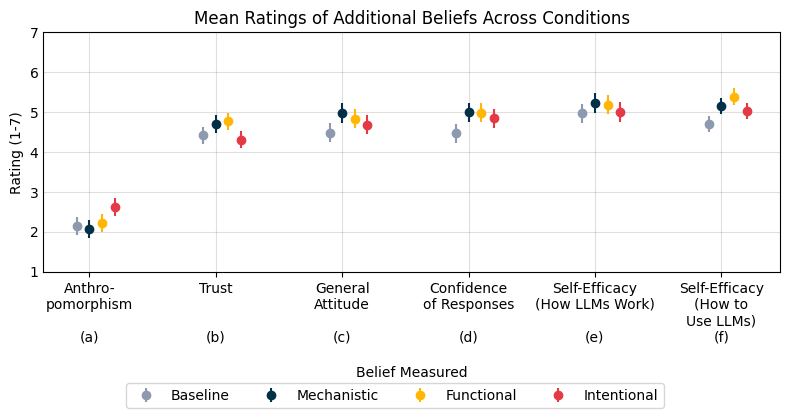

In [20]:
addit_dvs = dv_labels.keys()

means = []
errors = []

for addit_dv in addit_dvs:
    results_path = os.path.join(addit_dv_r_result_save_dir, '{}_results.txt'.format(addit_dv))

    graph_data, emmeans_df = analysis.read_emmeans_single_variable(
        results_path=results_path,
        grouping_source=addit_dv
    )
    print(graph_data)
    dv_means = list(np.array(graph_data['means']).squeeze())
    dv_errors = list(np.array(graph_data['errors']).squeeze())
    means.append(dv_means)
    errors.append(dv_errors)

means = np.array(means).T
errors = np.array(errors).T
fig, ax = visualizations.pointplot(
    means=means,
    errors=errors,
    color_idxs=condition_color_idxs,
    labels=conditions,
    show_legend=False,
    orientation='vertical',
    xlabel='Belief Measured',
    xtick_labels=[dv_labels[dv] for dv in addit_dvs],
    ylim=[1, 7],
    ylabel='Rating (1-7)',
    title='Mean Ratings of Additional Beliefs Across Conditions',
    show_grid=True,
    fig_size=(8, 4),
    show=False
)
# Add Legend outside of plot
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
plt.tight_layout()

save_path = os.path.join(addit_dv_graph_save_dir, 'dv_pointplot_emmeans.{}'.format(save_ext))
utils.informal_log("Saving graph to {}".format(save_path))

plt.savefig(save_path, bbox_inches='tight')
plt.show()
    


### Correlations Between Addit DVs

[1224_121231] Bolding items whose p-values < 0.0500000
Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/additional_dvs/correlations/correlations.json


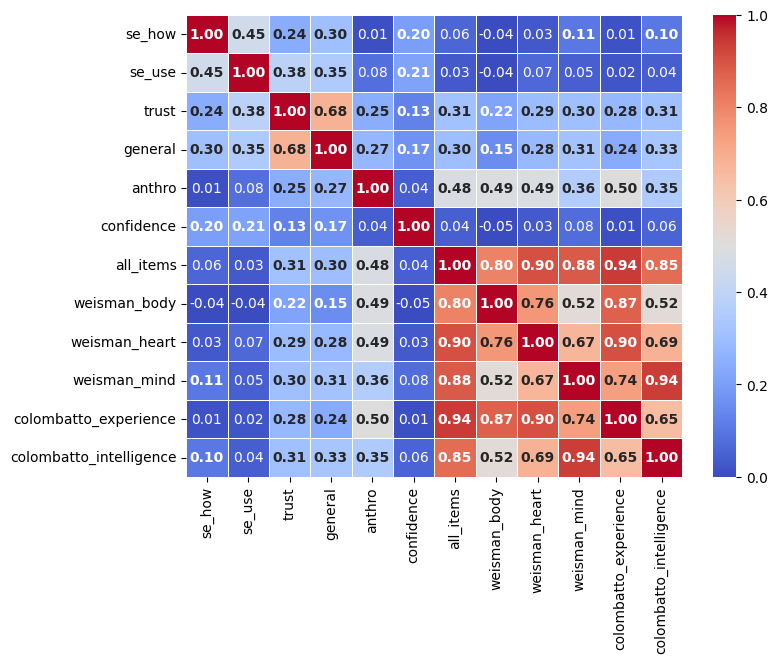

<Figure size 640x480 with 0 Axes>

In [37]:
addit_dv_csv_path = os.path.join(additional_dv_save_dir, 'additional_dvs.csv')
rating_csv_path = os.path.join(ratings_save_dir, 'ratings.csv')
p_threshold = 0.05

addit_dv_df = utils.read_file(addit_dv_csv_path)
rating_df = utils.read_file(rating_csv_path)

# add to addit_dv_df the mean category ratings
group_col_names = ['all_items', 'weisman_body', 'weisman_heart', 'weisman_mind', 'colombatto_experience', 'colombatto_intelligence']
addit_dv_list = list(addit_dvs.values())

corr_dict = analysis.addit_dv_correlations(
    addit_dv_df=addit_dv_df,
    rating_df=rating_df,
    addit_dv_list=addit_dv_list,
    group_col_names=group_col_names,
    min_max_scale=False, # Makes no difference bc rank correlation
    p_threshold=p_threshold,
    save_dir=correlation_dir,
    overwrite=True)



#### Correlations within Conditions

Index(['se_how', 'se_use', 'trust', 'general', 'anthro', 'confidence',
       'condition', 'participant_id'],
      dtype='object')
[0401_165405] Bolding items whose p-values < 0.0500000
Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/additional_dvs/correlations/Baseline/correlations.json


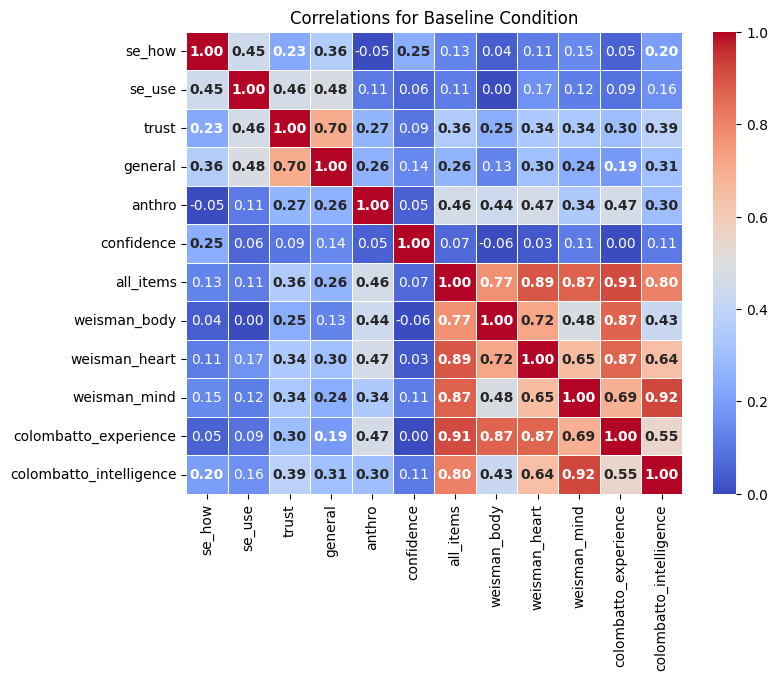

[0401_165407] Bolding items whose p-values < 0.0500000
Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/additional_dvs/correlations/Mechanistic/correlations.json


<Figure size 640x480 with 0 Axes>

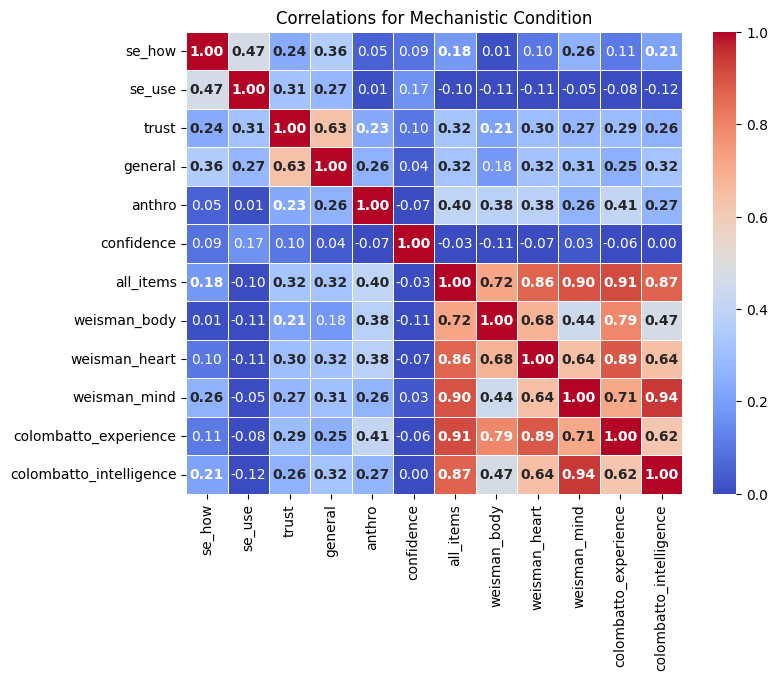

[0401_165408] Bolding items whose p-values < 0.0500000
Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/additional_dvs/correlations/Functional/correlations.json


<Figure size 640x480 with 0 Axes>

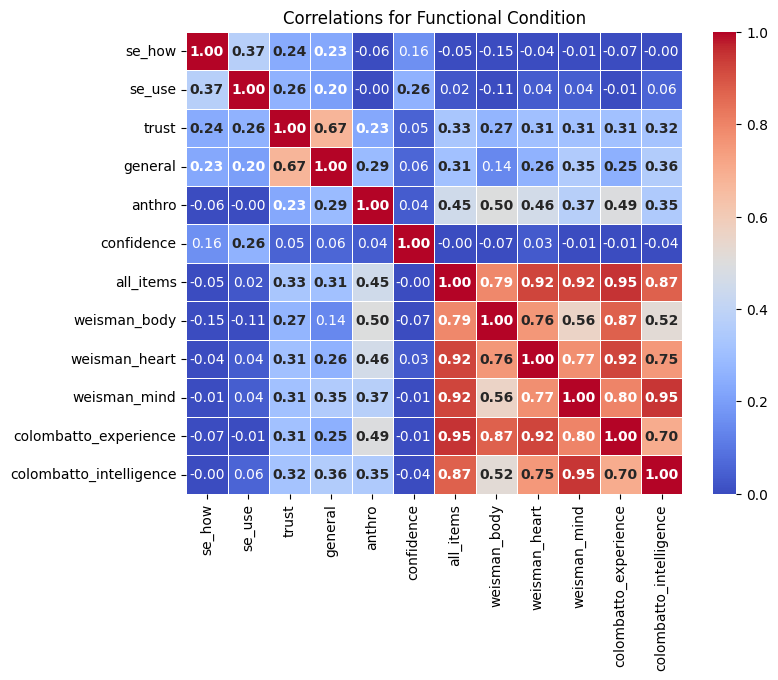

[0401_165409] Bolding items whose p-values < 0.0500000
Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/additional_dvs/correlations/Intentional/correlations.json


<Figure size 640x480 with 0 Axes>

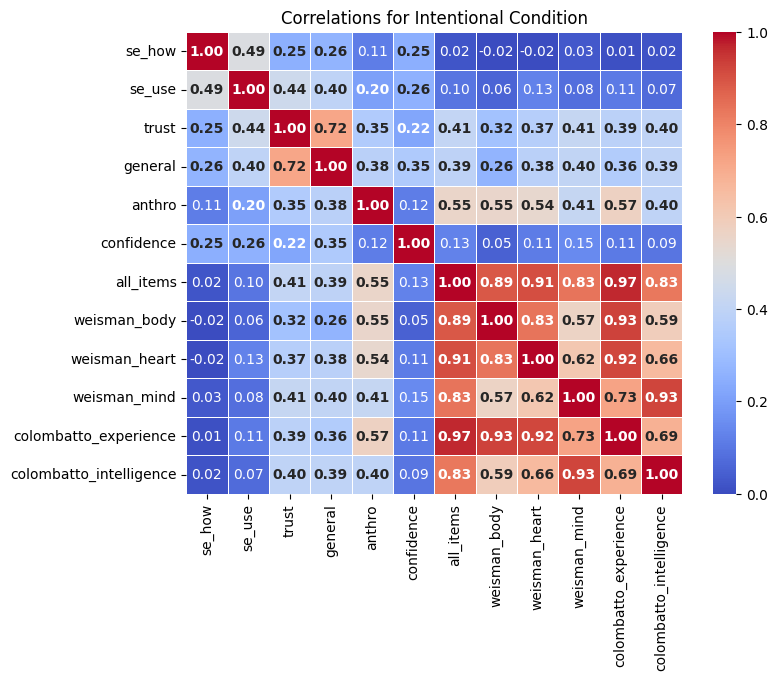

<Figure size 640x480 with 0 Axes>

In [ ]:
addit_dv_csv_path = os.path.join(attitudes_save_dir, 'attitudes.csv')
rating_csv_path = os.path.join(ratings_save_dir, 'ratings.csv')
p_threshold = 0.05

addit_dv_df = utils.read_file(addit_dv_csv_path)
rating_df = utils.read_file(rating_csv_path)

# add to addit_dv_df the mean category ratings
group_col_names = ['all_items', 'weisman_body', 'weisman_heart', 'weisman_mind', 'colombatto_experience', 'colombatto_intelligence']
addit_dv_list = list(addit_dvs.values())

print(addit_dv_df.columns)
for condition in conditions:
    cond_corr_dir = os.path.join(correlation_dir, condition)
    utils.ensure_dir(cond_corr_dir)
    cur_addit_dv_df = addit_dv_df[addit_dv_df['condition'] == condition]
    cur_rating_df = rating_df[rating_df['condition'] == condition]

    assert len(cur_addit_dv_df) == len(cur_rating_df)

    corr_dict = analysis.addit_dv_correlations(
        addit_dv_df=cur_addit_dv_df,
        rating_df=cur_rating_df,
        addit_dv_list=addit_dv_list,
        group_col_names=group_col_names,
        min_max_scale=False, # Makes no difference bc rank correlation
        p_threshold=p_threshold,
        title='Correlations for {} Condition'.format(condition),
        save_dir=cond_corr_dir,
        overwrite=True)
    



##### Visualize correlations of mean rating with all other Attitudess

all_items-anthro
all_items-general
all_items-trust
all_items-confidence
all_items-se_how
all_items-se_use
[0.4807775073861161, 0.2976467889766525, 0.31187261226692103, 0.04375552103411523, 0.0601753403506272, 0.03295667994281788]
[None, None, None, None, None, None]
[[0.24041834088499497, 0.3018898545843386], [0.3829790839385983, 0.34829797515694827]]
[None, None]
[0.6840045774763375, 0.44985312616572326]
[None, None]


/n/fs/ac-aiexhibit/explain-anthro-llm/src/visualizations.py:423: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc=legend_loc)
/n/fs/ac-aiexhibit/explain-anthro-llm/src/visualizations.py:423: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc=legend_loc)


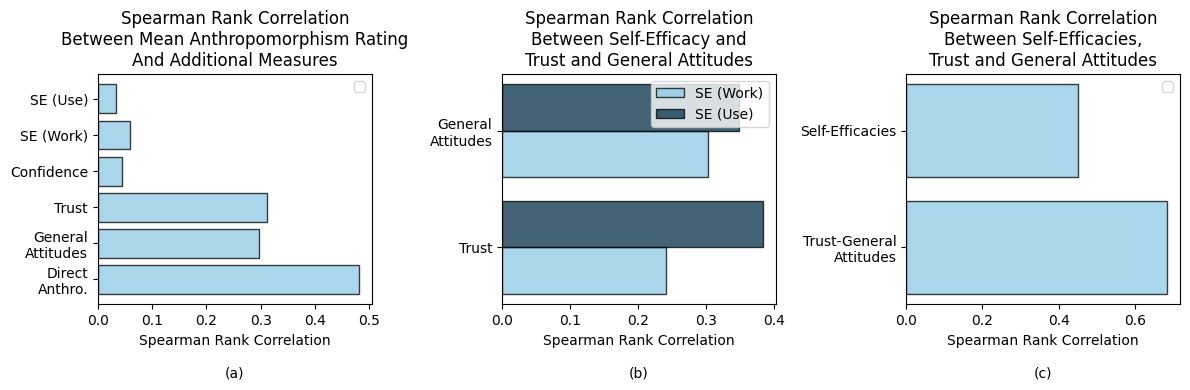

In [8]:
corr_dict_path = os.path.join(correlation_dir, 'correlations.json')
corr_dict = utils.read_file(corr_dict_path)

addit_dv_figs = {
    'anthro': 'Direct\nAnthro.',
    'general': 'General\nAttitudes',
    'trust': 'Trust',
    'confidence': 'Confidence',
    'se_how': 'SE (Work)',
    'se_use': 'SE (Use)',
    
}

corr_vals = []
labels = []
for name, label in addit_dv_figs.items():
    key = '-'.join(sorted([name, 'all_items']))
    print(key)
    corr_vals.append(corr_dict[key]['spearman'])
    labels.append(label)
    
print(corr_vals)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
# Plot correlations bw mean ratings and all other DVs
fig, axes[0] = visualizations.horizontal_bar_graph(
    data=[corr_vals],
    labels=labels,
    # vertical=False,
    # ylabel_rotation=30,
    xlabel='Spearman Rank Correlation\n\n(a)',
    title='Spearman Rank Correlation\nBetween Mean Anthropomorphism Rating\nAnd Additional Measures',
    fig=fig,
    ax=axes[0],
    show=False
)

# Plot correlations between {trust, general anthro} X {SE-how, SE-work}
corrs = {
    'trust': {
        'general',
        'se_how',
        'se_use'
    },
    'general': {
        'trust',
        'se_how',
        'se_use'
    },
}

labels = ['trust', 'general']
groups = ['se_how', 'se_use']
data = []

for group in groups:
    row = []
    for label in labels:
        key = '-'.join(sorted([group, label]))
        row.append(corr_dict[key]['spearman'])
    data.append(row)

groups = [addit_dv_figs[group] for group in groups]
labels = [addit_dv_figs[label] for label in labels]

print(data)
fig, axes[1] = visualizations.horizontal_bar_graph(
    data=data,
    labels=labels,
    groups=groups,
    # vertical=False,
    # ylabel_rotation=30,
    xlabel='Spearman Rank Correlation\n\n(b)',
    title='Spearman Rank Correlation\nBetween Self-Efficacy and\nTrust and General Attitudes',
    fig=fig,
    ax=axes[1],
    show=False
)


# Plot correlations between trust X general anthro, SE-how X SE-work}
data = [
    corr_dict['-'.join(sorted(['trust', 'general']))]['spearman'],
    corr_dict['-'.join(sorted(['se_use', 'se_how']))]['spearman'],
]
print(data)
fig, axes[2] = visualizations.horizontal_bar_graph(
    data=[data],
    labels=['Trust-General\nAttitudes', 'Self-Efficacies'],
    xlabel='Spearman Rank Correlation\n\n(c)',
    title='Spearman Rank Correlation\nBetween Self-Efficacies,\nTrust and General Attitudes',
    fig=fig,
    ax=axes[2],
    show=False
)

fig_save_path = os.path.join(correlation_dir, 'corr_fig.pdf')
plt.savefig(fig_save_path, bbox_inches='tight')
plt.show()


##### Correlations with Mechanistic Performance

[1220_112551] attention question: 52.89% of participants answered correctly
[1220_112551] sampling question: 81.82% of participants answered correctly
[1220_112551] data_quantity question: 97.52% of participants answered correctly
[1220_112551] generation question: 90.08% of participants answered correctly


/n/fs/ac-aiexhibit/explain-anthro-llm/src/visualizations.py:535: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


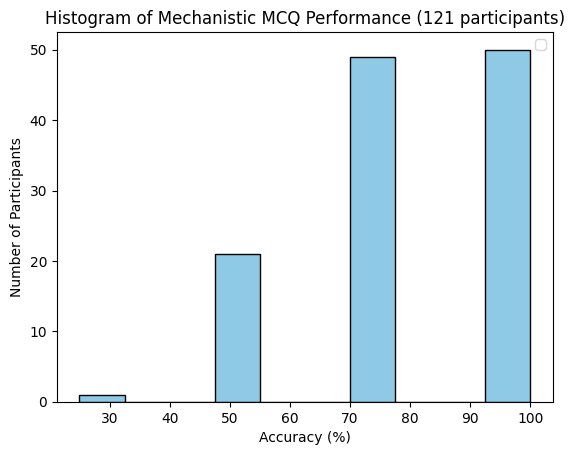

Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute/additional_dvs/mechanistic_quiz/mech_accuracy.csv
[1220_112552] Computing correlations with mechanistic quiz acc. Only using rows in mechanistic condition (116 rows)
[1220_112552] Bolding items whose p-values < 0.0500000
Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute/additional_dvs/mechanistic_quiz/mech_correlations.json


<Figure size 640x480 with 0 Axes>

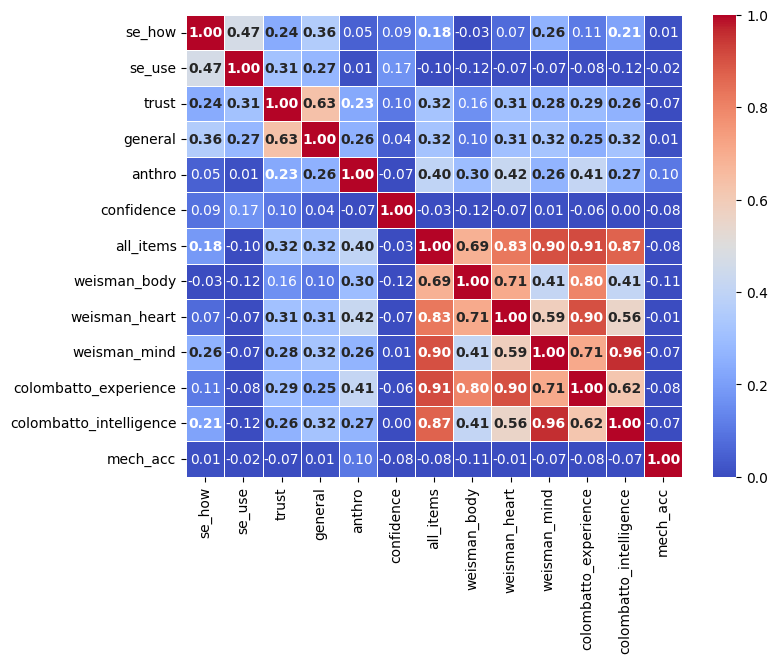

<Figure size 640x480 with 0 Axes>

In [37]:

p_threshold = 0.05
# The argument df is raw df from combined baseline + experimental
mech_quiz_df = analysis.mechanistic_mcq_analysis(
    df=df,
    save_dir=mech_save_dir,
    overwrite=True)

mech_corr_dict = analysis.addit_dv_correlations(
    addit_dv_df=addit_dv_df,
    rating_df=rating_df,
    addit_dv_list=addit_dv_list,
    group_col_names=group_col_names,
    mech_quiz_df=mech_quiz_df,
    p_threshold=p_threshold,
    save_dir=mech_save_dir,
    overwrite=True
)

In [ ]:


# The argument df is raw df from combined baseline + experimental
mech_quiz_df = analysis.mechanistic_mcq_analysis(
    df=df,
    save_dir=mech_save_dir,
    overwrite=True)



#### Free Response to coarse anthro


In [49]:
coarse_anthro_qid = 'DVCoarse2'
coarse_anthro_addit_qid = 'DVCoarse1'
coarse_anthro_save_path = os.path.join(additional_dv_save_dir, 'coarse_anthro_responses.txt')

coarse_anthro_df = analysis.save_frq(
    df=df,
    q_id=coarse_anthro_qid,
    addit_q_id=coarse_anthro_addit_qid,
    frq_save_path=coarse_anthro_save_path)

[1114_145329] 66fc12c9f1dfb65972597a3f [Slightly human-like]: 
	i believe the have the capacity to feel and be able to experience their own will / emotions but with that, i believe it would be very dangerous if robots were "human like" and able to think on their own
[1114_145329] 6674e27d7068f7b381b54c73 [Somewhat human-like]: 
	There basically computers or some type of computer generated AI
[1114_145329] 610786681f59e722c0a8b371 [Slightly human-like]: 
	try to sound human and express things in a way that makes them have a personality, try to be human like
[1114_145329] 66952d5507cd937cf7c2a35d [Fairly human-like]: 
	They understand very well by taking information from a lot of data but they are programmed that way. I guess we are too but they lack souls so thats the only difference.
[1114_145329] 6157d22b9998f96a77f41567 [Somewhat human-like]: 
	they aren't all like this but the one called Pi is the one that I think seems somewhat humanlike, like it will say it thinks or feels. but it

### Graphs from EMMeans Outputs

#### Bar Graphs of Conditions by Groups

Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/R_results/emmeans_category_graphs/weisman_emmeans_condition_by_group.csv
4
[0103_102702] Saved graph to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/R_results/emmeans_category_graphs/group_graph_weisman-ci_both.pdf


<Figure size 640x480 with 0 Axes>

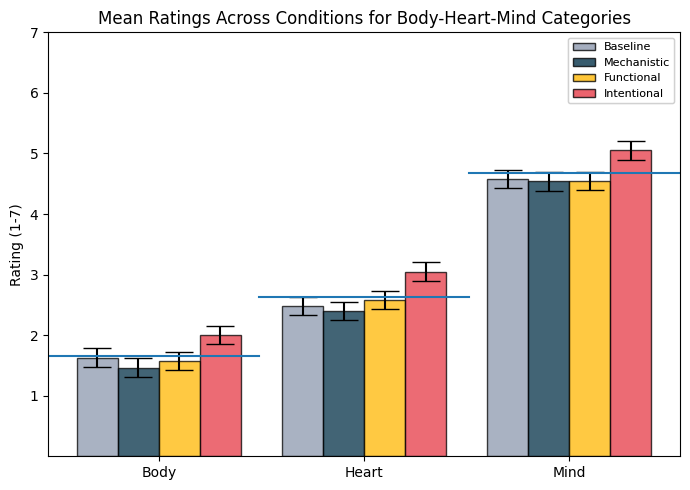

Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/R_results/emmeans_category_graphs/colombatto_emmeans_condition_by_group.csv
4
[0103_102703] Saved graph to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/R_results/emmeans_category_graphs/group_graph_colombatto-ci_both.pdf


<Figure size 640x480 with 0 Axes>

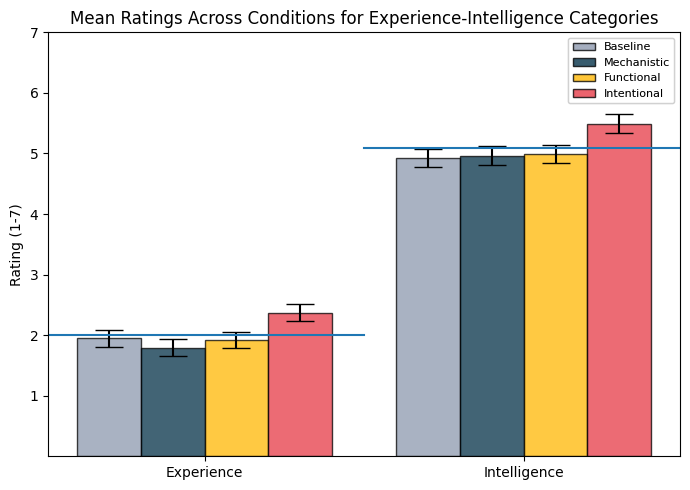

In [ ]:
grouping_sources = ['weisman', 'colombatto']
# categories_path = 'dependent_variables/groupings_colombatto_{}.json'.format(grouping_version)
r_results_path_template = os.path.join(R_results_save_dir, '{}_results.txt')

groupings = utils.read_file(categories_path)
for grouping_source in grouping_sources:

    groups = list(groupings[grouping_source].keys())
    r_results_path = r_results_path_template.format(grouping_source)
    if not os.path.exists(r_results_path):
        utils.informal_log("Path to R results file {} does not exist".format(r_results_path))
        continue
    emmeans_graph_data, emmeans_df = analysis.read_emmeans_marginalized_result(
        results_path=r_results_path,
        grouping_source=grouping_source,
        conditions=conditions,
        marginalized_var='group',
        marginalized_var_values=groups,
        save_dir=emmeans_category_graph_save_dir,
        overwrite=True
    )
    if grouping_source == 'weisman':
        title = "Mean Ratings Across Conditions for Body-Heart-Mind Categories"
    else:
        title = "Mean Ratings Across Conditions for Experience-Intelligence Categories"
    analysis.grouped_bar_graphs(
        groups=groups,
        grouping_source=grouping_source,
        conditions=conditions,
        graph_data=emmeans_graph_data,
        ci_dim='both',
        jitter_dim=None,
        line_start=None,
        title=title,
        save_dir=emmeans_category_graph_save_dir,
        save_ext=save_ext
    )


#### Bar graph of conditions not separated by category

[' condition   emmean     SE  df lower.CL upper.CL', ' Baseline      2.89 0.0699 467     2.76     3.03', ' Mechanistic   2.80 0.0705 467     2.66     2.94', ' Functional    2.90 0.0696 467     2.76     3.04', ' Intentional   3.37 0.0702 467     3.23     3.51']
Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/R_results/emmeans_graphs/weisman_emmeans_condition.csv
4
[0103_110449] Saved graph to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/R_results/emmeans_graphs/weisman_condition_bar.pdf


<Figure size 640x480 with 0 Axes>

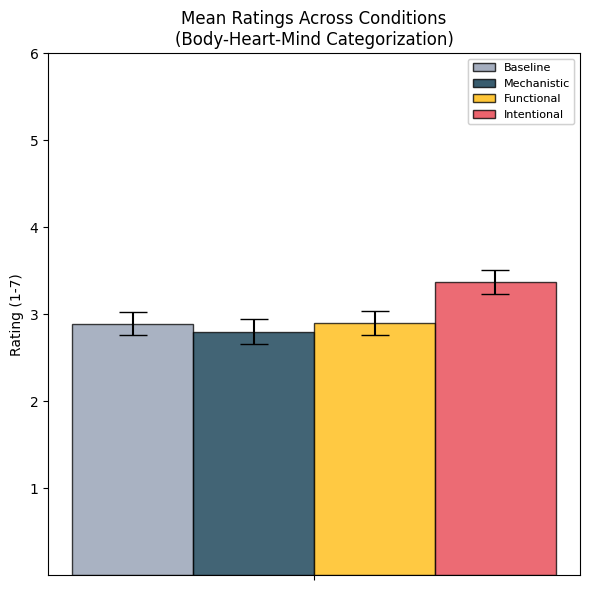

[' condition   emmean     SE  df lower.CL upper.CL', ' Baseline      3.44 0.0705 486     3.30     3.58', ' Mechanistic   3.38 0.0712 486     3.24     3.52', ' Functional    3.46 0.0703 486     3.32     3.59', ' Intentional   3.93 0.0708 486     3.79     4.07']
Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/R_results/emmeans_graphs/colombatto_emmeans_condition.csv
4
[0103_110450] Saved graph to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/R_results/emmeans_graphs/colombatto_condition_bar.pdf


<Figure size 640x480 with 0 Axes>

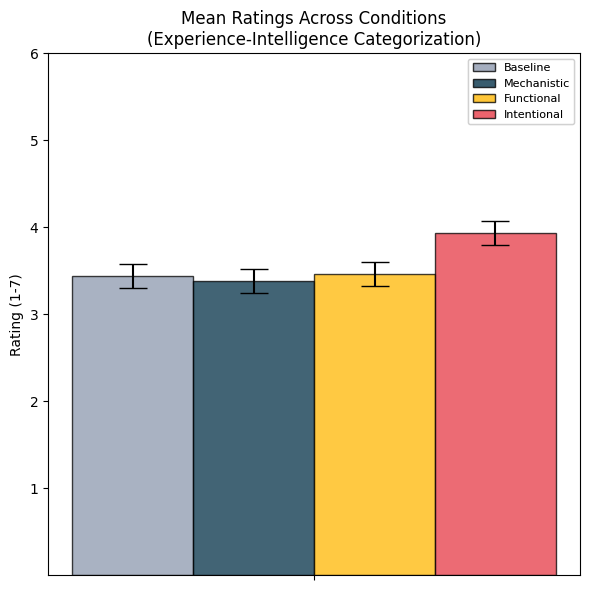

In [25]:
grouping_sources = ['weisman', 'colombatto']
group_categories_dict = {
    'weisman': 'Body-Heart-Mind',
    'colombatto': 'Experience-Intelligence'
}
r_results_path_template = os.path.join(R_results_save_dir, '{}_results.txt')

for grouping_source in grouping_sources:

    # groups = list(groupings[grouping_source].keys())
    r_results_path = r_results_path_template.format(grouping_source)
    if not os.path.exists(r_results_path):
        utils.informal_log("Path to R results file {} does not exist".format(r_results_path))
        continue
    emmeans_graph_data, emmeans_df = analysis.read_emmeans_single_variable(
        results_path=r_results_path,
        grouping_source=grouping_source,
        variable_name='condition',
        variable_values=conditions,
        save_dir=emmeans_graph_save_dir,
        overwrite=True
    )
    title = 'Mean Ratings Across Conditions\n({} Categorization)'.format(group_categories_dict[grouping_source])
    analysis.grouped_bar_graphs(
        groups=[],
        grouping_source=grouping_source,
        conditions=conditions,
        graph_data=emmeans_graph_data,
        ci_dim='both',
        jitter_dim=None,
        line_start=None,
        title=title,
        save_dir=emmeans_graph_save_dir,
        filename='{}_condition_bar'.format(grouping_source),
        save_ext=save_ext
    )


#### Bar graphs of category means

[' group emmean     SE  df lower.CL upper.CL', ' body    1.64 0.0395 755     1.56     1.72', ' heart   1.94 0.0382 663     1.86     2.01', ' mind    4.81 0.0379 641     4.74     4.89']
Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute/R_results/emmeans_graphs/weisman_emmeans_group.csv
3
[1206_162820] Saved graph to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute/R_results/emmeans_graphs/weisman_category_bar.svg


<Figure size 640x480 with 0 Axes>

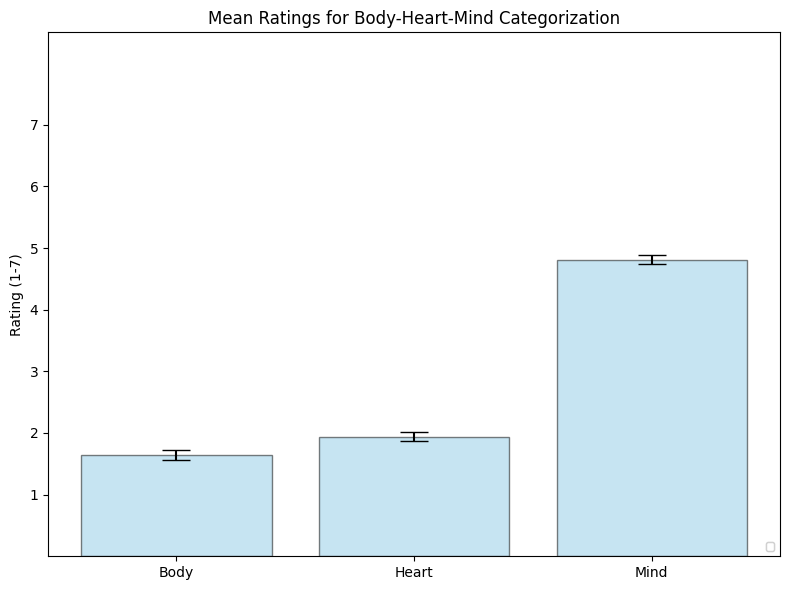

[' group        emmean     SE  df lower.CL upper.CL', ' experience     2.01 0.0358 511     1.94     2.08', ' intelligence   5.09 0.0392 734     5.02     5.17']
Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute/R_results/emmeans_graphs/colombatto_emmeans_group.csv
2
[1206_162820] Saved graph to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute/R_results/emmeans_graphs/colombatto_category_bar.svg


<Figure size 640x480 with 0 Axes>

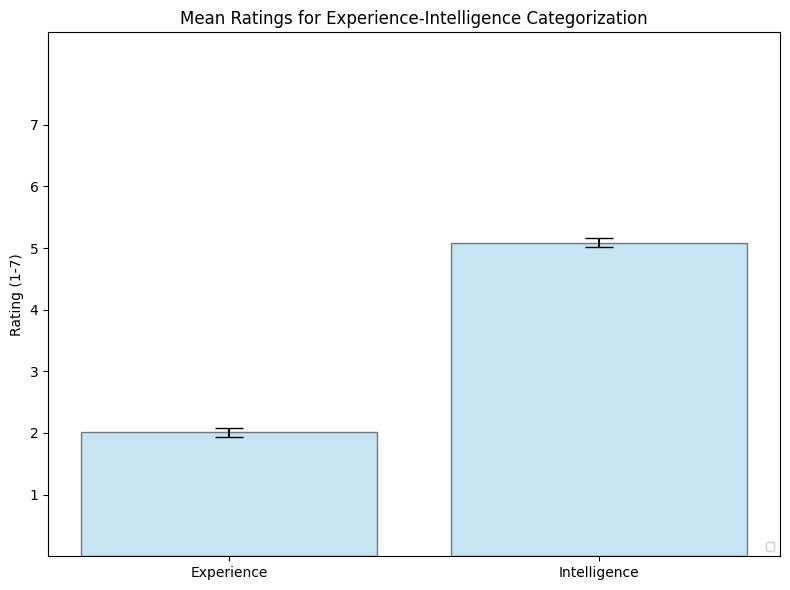

In [96]:
grouping_sources = ['weisman', 'colombatto']
r_results_path_template = os.path.join(R_results_save_dir, '{}_results.txt')

for grouping_source in grouping_sources:
    
    # groups = list(groupings[grouping_source].keys())
    r_results_path = r_results_path_template.format(grouping_source)
    if grouping_source == 'weisman':
        variable_values = ['body', 'heart', 'mind']
    else:
        variable_values = ['experience', 'intelligence']
    if not os.path.exists(r_results_path):
        utils.informal_log("Path to R results file {} does not exist".format(r_results_path))
        continue
    emmeans_graph_data, emmeans_df = analysis.read_emmeans_single_variable(
        results_path=r_results_path,
        grouping_source=grouping_source,
        variable_name='group',
        variable_values=variable_values,
        save_dir=emmeans_graph_save_dir,
        overwrite=True
    )
    
    # Make data 2D
    emmeans_graph_data['means'] = [emmeans_graph_data['means']]
    emmeans_graph_data['errors'] = [emmeans_graph_data['errors']]
    title = 'Mean Ratings for {} Categorization'.format(
        '-'.join([val.capitalize() for val in variable_values])
    )

    analysis.grouped_bar_graphs(
        groups=variable_values,
        grouping_source=grouping_source,
        conditions=[None],
        graph_data=emmeans_graph_data,
        ci_dim='both',
        jitter_dim=None,
        line_start=None,
        title=title,
        save_dir=emmeans_graph_save_dir,
        filename='{}_category_bar'.format(grouping_source),
        save_ext=save_ext
    )


#### Item level point plots

Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/R_results/item_level/item_means.csv
     condition  emmean     SE      df  lower.CL  upper.CL              item
0     Baseline    1.56  0.137  5731.0     1.291      1.83  admiring.someone
1  Mechanistic    1.45  0.138  5731.0     1.177      1.72  admiring.someone
2   Functional    1.66  0.137  5731.0     1.388      1.92  admiring.someone
3  Intentional    2.02  0.138  5731.0     1.747      2.29  admiring.someone
4     Baseline    1.68  0.137  5731.0     1.409      1.95   being.conscious
[1224_094339] Saved figure to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/R_results/item_level/item_level_graph.pdf


<Figure size 640x480 with 0 Axes>

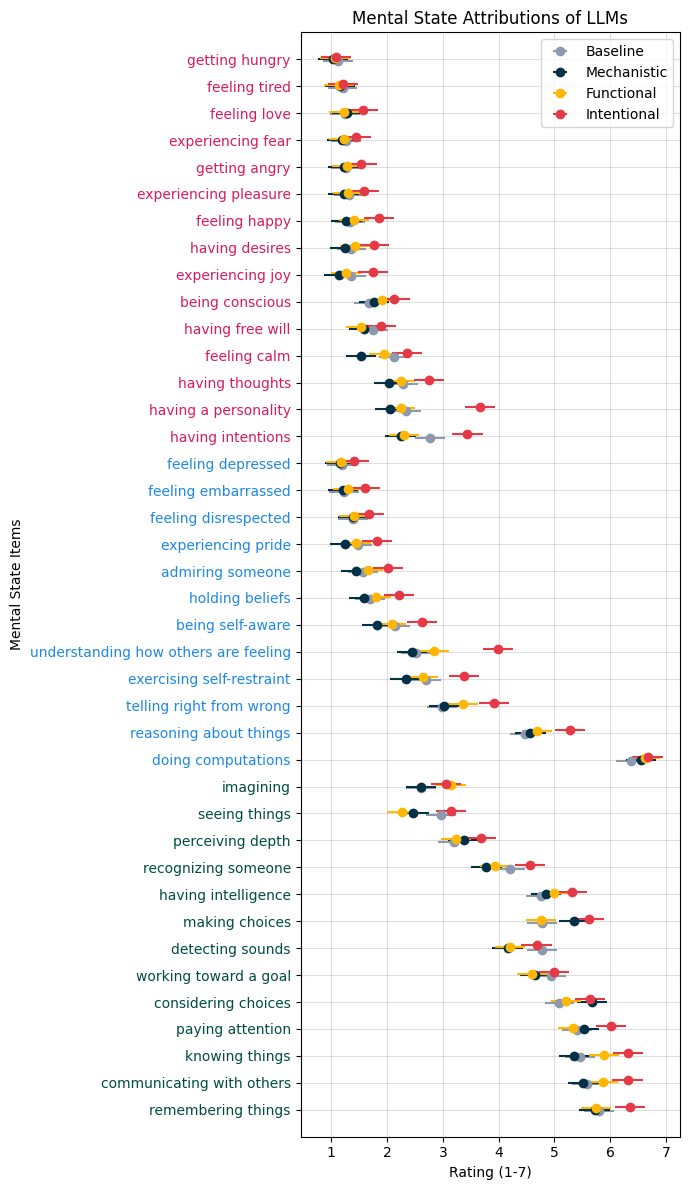

(<Figure size 700x1200 with 1 Axes>,
 <Axes: title={'center': 'Mental State Attributions of LLMs'}, xlabel='Rating (1-7)', ylabel='Mental State Items'>,
 ['remembering things',
  'communicating with others',
  'knowing things',
  'paying attention',
  'considering choices',
  'working toward a goal',
  'detecting sounds',
  'making choices',
  'having intelligence',
  'recognizing someone',
  'perceiving depth',
  'seeing things',
  'imagining',
  'doing computations',
  'reasoning about things',
  'telling right from wrong',
  'exercising self-restraint',
  'understanding how others are feeling',
  'being self-aware',
  'holding beliefs',
  'admiring someone',
  'experiencing pride',
  'feeling disrespected',
  'feeling embarrassed',
  'feeling depressed',
  'having intentions',
  'having a personality',
  'having thoughts',
  'feeling calm',
  'having free will',
  'being conscious',
  'experiencing joy',
  'having desires',
  'feeling happy',
  'experiencing pleasure',
  'getting an

In [ ]:
item_level_R_results_path = os.path.join(item_level_R_results_save_dir, 'results.txt')
save_path = os.path.join(item_level_R_results_save_dir, 'item_level_graph.pdf')
grouping_source = 'weisman'
items = utils.read_file(items_path)
items = [item.replace(' ', '.') for item in items]

# Get ready to sort DF by group
groupings = utils.read_file(categories_path)
grouping = groupings[grouping_source]
item_group_dict = {}
for k, vals in grouping.items():
    for val in vals:
        item_group_dict[val] = k


# conditions = ["Baseline", "Mechanistic", "Functional", "Intentional"]

graph_data, df = analysis.read_emmeans_marginalized_result(
    results_path=item_level_R_results_path,
    grouping_source="item_level",
    marginalized_var='item',
    marginalized_var_values=items,
    save_dir=item_level_R_results_save_dir,
    overwrite=True
)

analysis.plot_individual_items_single_axis(
    emmeans_df=df,
    item_group_dict=item_group_dict,
    conditions=conditions,
    color_idxs=condition_color_idxs,
    fig_size=(7, 12),
    xtick_labels=[i for i in range(1, 8)],
    xlabel='Rating (1-7)',
    save_path=save_path,
    show=True
)


#### Overall Pointplots (separate by condition)

In [88]:
def overall_pointplot(r_results_path,
                      grouping_source,
                      conditions,
                      emmeans_graph_save_dir,
                      condition_color_idxs,
                      orientation,
                      label=True,
                      show_legend=False,
                      title=None,
                      fig=None,
                      ax=None,
                      show=False):
    emmeans_graph_data, emmeans_df = analysis.read_emmeans_single_variable(
        results_path=r_results_path,
        grouping_source=grouping_source,
        variable_name='condition',
        variable_values=conditions,
        save_dir=emmeans_graph_save_dir,
        overwrite=False)
    
    emmeans_df = analysis._format_and_pivot_emmeans_df(
        emmeans_df=emmeans_df,
        target_column=None
    )
    
    means = emmeans_df['mean']
    means = [[mean] for mean in means]

    errors = emmeans_df['ci_error'].to_numpy()
    errors = [[error] for error in errors]

    if orientation == 'horizontal':
        ytick_labels = ['']
        ylabel = 'Overall Item Mean'
        xtick_labels = [i for i in range(1, 8)]
        xlabel = 'Rating (1-7)'
        fig_size = (7, 3)

    else:
        xtick_labels = ['']
        if fig is None and ax is None:
            xlabel = 'Overall Item Mean'
        else:
            xlabel = 'Overall\nItem Mean\n(a)'
        ytick_labels = [i for i in range(1, 8)]
        ylabel = 'Rating (1-7)'
        fig_size = (2, 4)
        xlim = (-1, 1)

    if label:
        labels = conditions
    else:
        labels = None

    fig, ax = visualizations.pointplot(
        fig=fig,
        ax=ax,
        means=means,
        errors=errors,
        orientation=orientation,
        labels=labels,
        show_legend=show_legend,
        ytick_labels=ytick_labels,
        xtick_labels=xtick_labels,
        xlabel=xlabel,
        ylabel=ylabel,
        xlim=xlim,
        title=title,
        legend_loc='upper left',
        fig_size=fig_size,
        color_idxs=condition_color_idxs,
        marker_size=10,
        show_grid=True,
        save_path=None,
        show=show)
    return fig, ax

     condition  emmean      SE     df  lower.CL  upper.CL
0     Baseline    2.89  0.0699  467.0      2.76      3.03
1  Mechanistic    2.80  0.0705  467.0      2.66      2.94
2   Functional    2.90  0.0696  467.0      2.76      3.04
3  Intentional    3.37  0.0702  467.0      3.23      3.51


<Figure size 640x480 with 0 Axes>

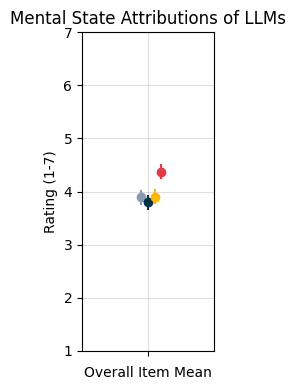

     condition  emmean      SE     df  lower.CL  upper.CL
0     Baseline    3.44  0.0705  486.0      3.30      3.58
1  Mechanistic    3.38  0.0712  486.0      3.24      3.52
2   Functional    3.46  0.0703  486.0      3.32      3.59
3  Intentional    3.93  0.0708  486.0      3.79      4.07


<Figure size 640x480 with 0 Axes>

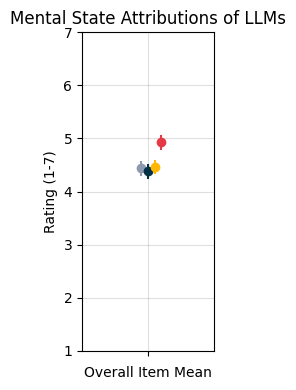

In [ ]:
grouping_sources = ['weisman', 'colombatto']
orientation = 'vertical'
# grouping_source = 'weisman'

for grouping_source in grouping_sources:
    categories_path = 'dependent_variables/groupings_colombatto_{}.json'.format(grouping_version)
    r_results_path_template = os.path.join(R_results_save_dir, '{}_results.txt')

    groupings = utils.read_file(categories_path)
    groups = list(groupings[grouping_source].keys())

    r_results_path = r_results_path_template.format(grouping_source)
    if not os.path.exists(r_results_path):
        raise ValueError("Path to R results file {} does not exist".format(r_results_path))
        
    overall_pointplot(
        r_results_path=r_results_path,
        grouping_source=grouping_source,
        conditions=conditions,
        emmeans_graph_save_dir=emmeans_graph_save_dir,
        condition_color_idxs=condition_color_idxs,
        title='Mental State Attributions of LLMs',
        legend=False,
        fig=None,
        ax=None)
    

#### Category Level Pointplots (separate by condition)

In [15]:
def category_level_pointplot(r_results_path,
                      grouping_source,
                      groups,
                      conditions,
                      emmeans_graph_save_dir,
                      condition_color_idxs,
                      orientation,
                      show_xlabels,
                      show_ylabels,
                      label=False,
                      show_legend=True,
                      title=None,
                      fig=None,
                      ax=None,
                      show=False,
                      save_path=None):
    emmeans_graph_data, emmeans_df = analysis.read_emmeans_marginalized_result(
        results_path=r_results_path,
        grouping_source=grouping_source,
        conditions=conditions,
        marginalized_var='group',
        marginalized_var_values=groups,
        save_dir=emmeans_category_graph_save_dir,
        overwrite=True
    )

    pivot_df = analysis._format_and_pivot_emmeans_df(
        emmeans_df=emmeans_df,
        target_column='group'
    )

    means = pivot_df[["mean-{}".format(condition) for condition in conditions]].to_numpy().T
    errors = pivot_df[["ci_error-{}".format(condition) for condition in conditions]].to_numpy().T
    print(means.shape)
    if orientation == 'horizontal':
        if show_ylabels:
            ytick_labels = [label.capitalize() for label in pivot_df['group'].to_list()]
            ylabel = 'Item Categories'
        else:
            ytick_labels = None
            ylabel = None

        if show_xlabels:
            xtick_labels = [i for i in range(1, 8)]
            xlabel = 'Rating (1-7)'
        else:
            xtick_labels = None
            xlabel = None
        fig_size = (7, 3)

    else:
        if show_xlabels:
            xtick_labels = [label.capitalize() for label in pivot_df['group'].to_list()]
            if fig is None and ax is None:
                xlabel = 'Item Categories'
            else:
                xlabel = 'Item Categories\n(b)'
        else:
            xtick_labels = None
            xlabel = None

        if show_ylabels:
            ytick_labels = [i for i in range(1, 8)]
            ylabel = 'Rating (1-7)'
        else:
            ytick_labels = None
            ylabel = None
            
        fig_size = (3, 4)
        if grouping_source == 'weisman':
            xlim = (-0.5, 2.5)
        else:
            xlim = (-0.5, 1.5)
        
    if label:
        labels = conditions
    else:
        labels = None

    fig, ax = visualizations.pointplot(
        fig=fig,
        ax=ax,
        means=means,
        errors=errors,
        orientation=orientation,
        labels=labels,
        show_legend=show_legend,
        ytick_labels=ytick_labels,
        xtick_labels=xtick_labels,
        xlabel=xlabel,
        ylabel=ylabel,
        xlim=xlim,
        title=title,
        legend_loc='upper left',
        fig_size=fig_size,
        color_idxs=condition_color_idxs,
        marker_size=10,
        show_grid=True,
        save_path=save_path,
        show=show)

    return fig, ax

Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/R_results/emmeans_category_graphs/weisman_emmeans_condition_by_group.csv
Baseline body
     condition  emmean      SE     df  lower.CL  upper.CL  group
0     Baseline    1.63  0.0768  682.0      1.48      1.78   body
1  Mechanistic    1.46  0.0775  682.0      1.31      1.62   body
2   Functional    1.57  0.0765  682.0      1.42      1.72   body
3  Intentional    2.00  0.0772  682.0      1.85      2.15   body
4     Baseline    2.48  0.0795  780.0      2.32      2.63  heart
Baseline heart
     condition  emmean      SE     df  lower.CL  upper.CL  group
0     Baseline    1.63  0.0768  682.0      1.48      1.78   body
1  Mechanistic    1.46  0.0775  682.0      1.31      1.62   body
2   Functional    1.57  0.0765  682.0      1.42      1.72   body
3  Intentional    2.00  0.0772  682.0      1.85      2.15   body
4     Baseline    2.48  0.0795  780.0      2.32      2.63  heart
Baseline mind
     condition  

<Figure size 640x480 with 0 Axes>

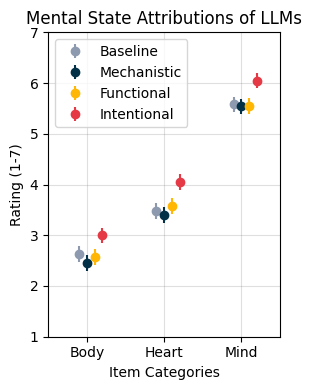

Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/R_results/emmeans_category_graphs/colombatto_emmeans_condition_by_group.csv
Baseline experience
     condition  emmean      SE     df  lower.CL  upper.CL         group
0     Baseline    1.95  0.0714  511.0      1.81      2.09    experience
1  Mechanistic    1.79  0.0721  511.0      1.65      1.93    experience
2   Functional    1.92  0.0711  511.0      1.78      2.06    experience
3  Intentional    2.37  0.0718  511.0      2.23      2.51    experience
4     Baseline    4.93  0.0783  734.0      4.78      5.08  intelligence
Baseline intelligence
     condition  emmean      SE     df  lower.CL  upper.CL         group
0     Baseline    1.95  0.0714  511.0      1.81      2.09    experience
1  Mechanistic    1.79  0.0721  511.0      1.65      1.93    experience
2   Functional    1.92  0.0711  511.0      1.78      2.06    experience
3  Intentional    2.37  0.0718  511.0      2.23      2.51    experience
4 

<Figure size 640x480 with 0 Axes>

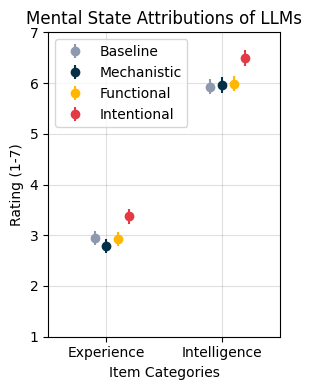

In [ ]:
grouping_sources = ['weisman', 'colombatto']
orientation = 'vertical'
# grouping_source = 'weisman'

for grouping_source in grouping_sources:
    categories_path = 'dependent_variables/groupings_colombatto_{}.json'.format(grouping_version)
    r_results_path_template = os.path.join(R_results_save_dir, '{}_results.txt')

    groupings = utils.read_file(categories_path)
    groups = list(groupings[grouping_source].keys())

    r_results_path = r_results_path_template.format(grouping_source)
    if not os.path.exists(r_results_path):
        raise ValueError("Path to R results file {} does not exist".format(r_results_path))
        
    fig_save_path = os.path.join(
        emmeans_category_graph_save_dir, 
        '{}_category_graph_{}.{}'.format(grouping_source, orientation, save_ext))
    category_level_pointplot(
        r_results_path=r_results_path,
        grouping_source=grouping_source,
        groups=groups,
        conditions=conditions,
        emmeans_graph_save_dir=emmeans_graph_save_dir,
        condition_color_idxs=condition_color_idxs,
        orientation=orientation,
        show_xlabels=True,
        show_ylabels=True,
        label=True,
        show_legend=True,
        title='Mental State Attributions of LLMs',
        fig=None,
        ax=None,
        show=True,
        save_path=fig_save_path)

#### Combine overall and category level pointplots into 1 figure

Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/R_results/emmeans_category_graphs/weisman_emmeans_condition_by_group.csv
     condition  emmean      SE     df  lower.CL  upper.CL  group
0     Baseline    1.63  0.0768  682.0      1.48      1.78   body
1  Mechanistic    1.46  0.0775  682.0      1.31      1.62   body
2   Functional    1.57  0.0765  682.0      1.42      1.72   body
3  Intentional    2.00  0.0772  682.0      1.85      2.15   body
4     Baseline    2.48  0.0795  780.0      2.32      2.63  heart
     condition  emmean      SE     df  lower.CL  upper.CL
0     Baseline    2.89  0.0699  467.0      2.76      3.03
1  Mechanistic    2.80  0.0705  467.0      2.66      2.94
2   Functional    2.90  0.0696  467.0      2.76      3.04
3  Intentional    3.37  0.0702  467.0      3.23      3.51
[0103_120114] Saving graph to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/R_results/emmeans_category_graphs/weisman_overallandcat

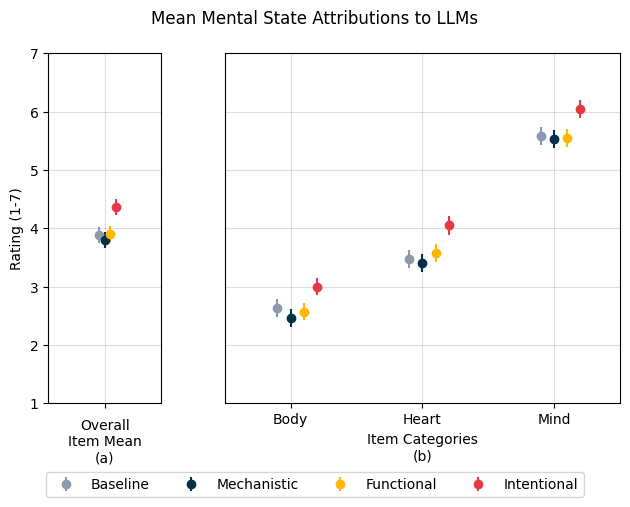

In [ ]:
grouping_sources = ['weisman', 'colombatto']
orientation = 'vertical'
# grouping_source = 'weisman'

for grouping_source in grouping_sources:
    categories_path = 'dependent_variables/groupings_colombatto_{}.json'.format(grouping_version)
    r_results_path_template = os.path.join(R_results_save_dir, '{}_results.txt')

    groupings = utils.read_file(categories_path)
    groups = list(groupings[grouping_source].keys())

    r_results_path = r_results_path_template.format(grouping_source)
    if not os.path.exists(r_results_path):
        raise ValueError("Path to R results file {} does not exist".format(r_results_path))
    
    # Create fig with multiple subplots
    fig, axes = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [1, 3.5]})

    # Right plot is means by category
    fig, axes[1] = category_level_pointplot(
        r_results_path=r_results_path,
        grouping_source=grouping_source,
        conditions=conditions,
        emmeans_graph_save_dir=emmeans_graph_save_dir,
        condition_color_idxs=condition_color_idxs,
        orientation=orientation,
        show_xlabels=True,
        show_ylabels=False,
        label=False,
        show_legend=False,
        title=None,
        fig=fig,
        ax=axes[1],
        show=False,
        save_path=None)
    
    # Left plot should be the overall means
    fig, axes[0] = overall_pointplot(
        r_results_path=r_results_path,
        grouping_source=grouping_source,
        conditions=conditions,
        emmeans_graph_save_dir=emmeans_graph_save_dir,
        condition_color_idxs=condition_color_idxs,
        orientation=orientation,
        label=True,
        show_legend=False,
        title=None,
        fig=fig,
        ax=axes[0],
        show=False)

    fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
    fig.suptitle('Mean Mental State Attributions to LLMs')
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.25)

    fig_save_path = os.path.join(
        emmeans_category_graph_save_dir,
        '{}_overallandcategory_graph_{}.{}'.format(grouping_source, orientation, save_ext)
    )

    utils.informal_log("Saving graph to {}".format(fig_save_path))
    plt.savefig(fig_save_path, bbox_inches="tight")
    plt.show()
    
    break

#### Colombatto, Factor Analysis, Mentioned/Unmentioned items in a figure together

In [ ]:
# Figure setup
plt.ioff()

fig, axes = plt.subplots(1, 3, sharey=True, gridspec_kw={'width_ratios': [1.25, 1.5, 1]});
# conditions = ['Baseline', 'Mechanistic', 'Functional', 'Intentional']

['condition', 'emmean', 'SE', 'df', 'lower.CL', 'upper.CL']
['Baseline', '1.95', '0.0714', '511', '1.81', '2.09']
['condition', 'emmean', 'SE', 'df', 'lower.CL', 'upper.CL']
['Mechanistic', '1.79', '0.0721', '511', '1.65', '1.93']
['condition', 'emmean', 'SE', 'df', 'lower.CL', 'upper.CL']
['Functional', '1.92', '0.0711', '511', '1.78', '2.06']
['condition', 'emmean', 'SE', 'df', 'lower.CL', 'upper.CL']
['Intentional', '2.37', '0.0718', '511', '2.23', '2.51']
['condition', 'emmean', 'SE', 'df', 'lower.CL', 'upper.CL']
['Baseline', '4.93', '0.0783', '734', '4.78', '5.08']
['condition', 'emmean', 'SE', 'df', 'lower.CL', 'upper.CL']
['Mechanistic', '4.96', '0.0789', '734', '4.81', '5.12']
['condition', 'emmean', 'SE', 'df', 'lower.CL', 'upper.CL']
['Functional', '4.99', '0.0779', '734', '4.84', '5.14']
['condition', 'emmean', 'SE', 'df', 'lower.CL', 'upper.CL']
['Intentional', '5.49', '0.0786', '734', '5.33', '5.64']
Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_

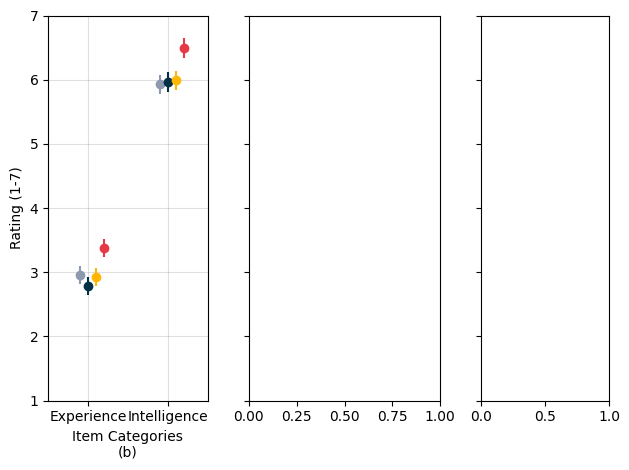

In [ ]:


# Factor Analysis in Middle
# TODO
# Colombatto on Left
grouping_source = 'colombatto'
orientation = 'vertical'
r_results_path_template = os.path.join(R_results_save_dir, '{}_results.txt')
r_results_path = r_results_path_template.format(grouping_source)
if not os.path.exists(r_results_path):
    raise ValueError("Path to R results file {} does not exist".format(r_results_path))
       
categories_path = 'dependent_variables/groupings_colombatto_{}.json'.format(grouping_version)
groupings = utils.read_file(categories_path)
groups = list(groupings[grouping_source].keys())
fig, axes[0] = category_level_pointplot(
    r_results_path=r_results_path,
    grouping_source=grouping_source,
    groups=groups, 
    conditions=conditions,
    emmeans_graph_save_dir=emmeans_graph_save_dir,
    condition_color_idxs=condition_color_idxs,
    orientation=orientation,
    show_xlabels=True,
    show_ylabels=True,
    label=True,
    show_legend=False,
    title=None,
    fig=fig,
    ax=axes[0],
    show=False,
    save_path=None)

plt.show()

#### Combine Item Level and Category Point Plots

[1224_094347] Category Means from data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/R_results/weisman_results.txt
[1224_094347] Item Level Means from data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/R_results/item_level/results.txt
Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/R_results/item_level/item_means.csv
Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/R_results/emmeans_category_graphs/weisman_emmeans_condition_by_group.csv
     condition  emmean     SE      df  lower.CL  upper.CL              item
0     Baseline    1.56  0.137  5731.0     1.291      1.83  admiring.someone
1  Mechanistic    1.45  0.138  5731.0     1.177      1.72  admiring.someone
2   Functional    1.66  0.137  5731.0     1.388      1.92  admiring.someone
3  Intentional    2.02  0.138  5731.0     1.747      2.29  admiring.someone
4     Baseline    1.68  0.137  5731.0     1.409      1

/n/fs/ac-aiexhibit/explain-anthro-llm/src/visualizations.py:1039: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/n/fs/ac-aiexhibit/explain-anthro-llm/src/visualizations.py:1031: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/n/fs/ac-aiexhibit/explain-anthro-llm/src/visualizations.py:1039: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


[1224_094348] Saved figure to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/R_results/emmeans_graphs/item_and_weisman_category_level_graph.pdf
Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/R_results/emmeans_graphs/item_order.txt


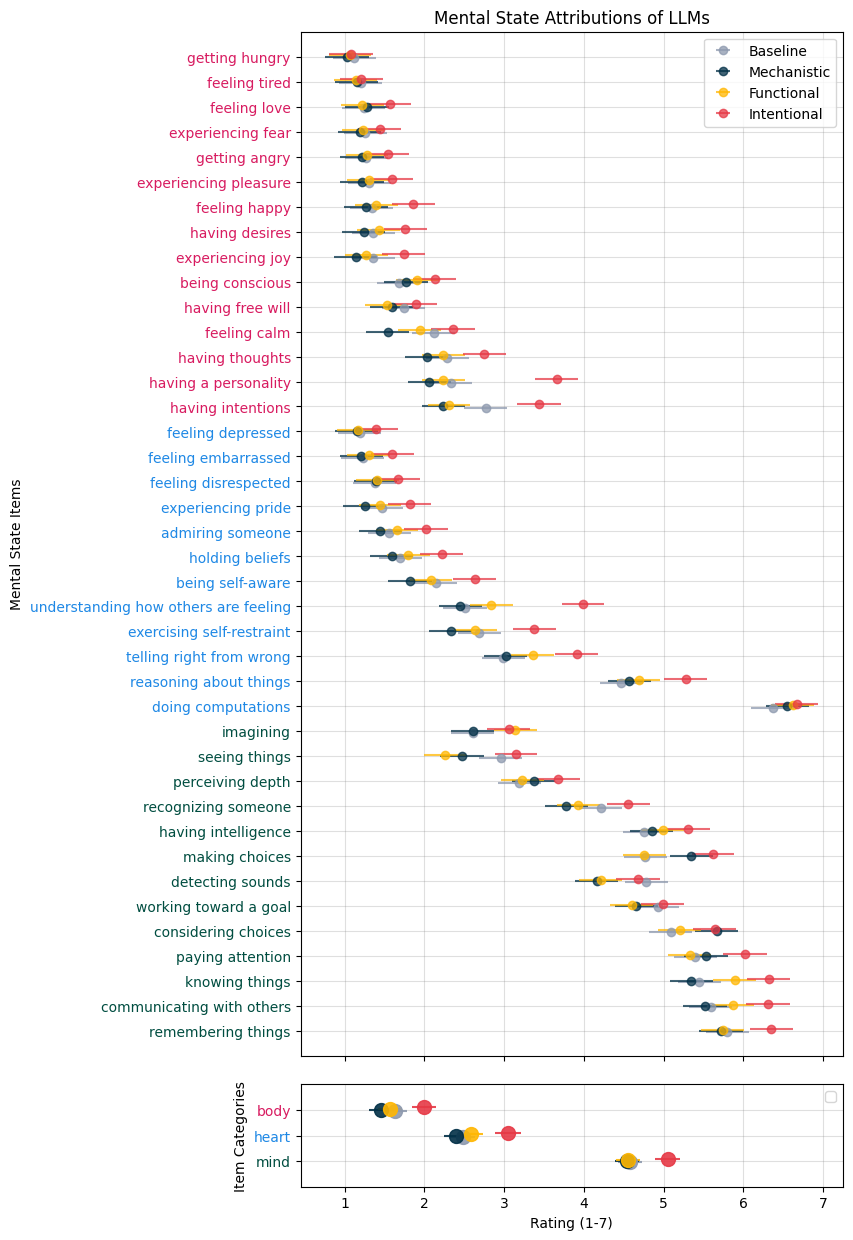

In [ ]:
item_level_R_results_path = os.path.join(item_level_R_results_save_dir, 'results.txt')
category_r_results_path_template = os.path.join(R_results_save_dir, '{}_results.txt')
categories_path = 'dependent_variables/groupings_colombatto_{}.json'.format(grouping_version)
grouping_source = 'weisman'

# Graph save path
save_path = os.path.join(emmeans_graph_save_dir, 'item_and_{}_category_level_graph.pdf'.format(grouping_source))
# Load groupings
groupings = utils.read_file(categories_path)
groups = list(groupings[grouping_source].keys())
# Load path for category results
category_r_results_path = category_r_results_path_template.format(grouping_source)
if not os.path.exists(category_r_results_path):
    raise ValueError("Path to R results file {} does not exist".format(category_r_results_path))
utils.informal_log("Category Means from {}".format(category_r_results_path))
if not os.path.exists(item_level_R_results_path):
    raise ValueError("Path to R results file {} does not exist".format(item_level_R_results_path))
utils.informal_log("Item Level Means from {}".format(item_level_R_results_path))

items = utils.read_file(items_path)
items = [item.replace(' ', '.') for item in items]

# Get ready to sort item level DF by group
groupings = utils.read_file(categories_path)
grouping = groupings[grouping_source]
categories = list(groupings[grouping_source].keys())

item_group_dict = {}
for k, vals in grouping.items():
    for val in vals:
        item_group_dict[val] = k

# Read item-level data
item_graph_data, item_df = analysis.read_emmeans_marginalized_result(
    results_path=item_level_R_results_path,
    grouping_source="item_level",
    marginalized_var='item',
    marginalized_var_values=items,
    save_dir=item_level_R_results_save_dir,
    overwrite=True
)

# Read category level data
category_graph_data, category_df = analysis.read_emmeans_marginalized_result(
    results_path=category_r_results_path,
    grouping_source=grouping_source,
    conditions=conditions,
    marginalized_var='group',
    marginalized_var_values=groups,
    save_dir=emmeans_category_graph_save_dir,
    overwrite=True
)

# Create figure and axes with shared x-axis
fig = plt.figure(figsize=(7, 15))
gs = gridspec.GridSpec(2, 1, height_ratios=[10, 1], hspace=0.05)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1],  sharex=ax1)

# Plot item-level
fig, ax1, ytick_labels = analysis.plot_individual_items_single_axis(
    fig=fig,
    ax=ax1,
    emmeans_df=item_df,
    item_group_dict=item_group_dict,
    conditions=conditions,
    alpha=0.75,
    color_idxs=condition_color_idxs,
    save_path=None,
    show=False
)

# Remove x-tick labels from top axis
ax1.tick_params(labelbottom=False)

# Plot category means
fig, ax2 = analysis.plot_category_items_single_axis(
    emmeans_df=category_df,
    conditions=conditions,
    # Figure parameters
    fig=fig,
    ax=ax2,
    fig_size=None,
    alpha=0.9,
    color_idxs=condition_color_idxs,
    marker_size=10,
    save_path=None,
    show=False)

plt.savefig(save_path, bbox_inches="tight")
utils.informal_log("Saved figure to {}".format(save_path))

# Will be in reverse order since (0, 0) is bottom left corner
item_order_path = os.path.join(emmeans_graph_save_dir, 'item_order.txt')
utils.write_file(ytick_labels, item_order_path, overwrite=True)

plt.show()

### Inter-rater Reliability (Fleiss' Kappa, Krippendorff's Alpha) (opt)

In [ ]:
# Run IRR (inter rater)
# rating_df_path = 'data/pilot/analysis_min_20/ratings.csv'
ratings_path = os.path.join(ratings_save_dir, 'ratings.csv')
# dv_items_path = 'dependent_variables/full_list_40.txt'
categories_path = 'dependent_variables/groupings_colombatto_{}.json'.format(grouping_version)

rating_df = utils.read_file(ratings_path)
dv_items = utils.read_file(items_path)
groupings = utils.read_file(categories_path)
# conditions = ['Baseline', 'Mechanistic', 'Functional', 'Intentional']

results = analysis.calculate_irr(
    rating_df=rating_df,
    dv_items=dv_items,
    conditions=conditions,
    groupings=groupings,
    save_dir=reliability_save_dir)

# Unpack outputs
for name, value in results.items():
    for vname, vvalue in value.items():
        utils.informal_log("{}-{}: {:.4f}".format(name, vname, vvalue))
    print("")



[[112   3   0   1   2   0   0]
 [103  10   3   0   2   0   0]
 [ 95  12   6   2   2   1   0]
 [ 78  16  10   9   2   2   1]
 [ 44  17  12  25  12   3   5]
 [ 73  15   6   9   4   4   7]
 [ 99  11   3   2   2   1   0]
 [ 95  16   5   2   0   0   0]
 [ 72  24  13   7   1   1   0]
 [ 53  30  13  15   2   4   1]
 [100  12   2   2   1   1   0]]
[[113   2   1   0   0   0   0]
 [110   3   0   1   0   1   1]
 [ 99  10   5   1   0   1   0]
 [ 87  11   5   9   2   0   2]
 [ 54  28   9  13   6   1   5]
 [ 90  12   5   2   2   3   2]
 [103   9   1   1   0   1   1]
 [102  10   0   2   1   1   0]
 [ 81  14   5   7   3   4   2]
 [ 74  17  11   6   4   2   2]
 [105   7   2   0   0   1   1]]
[[115   2   1   0   1   0   0]
 [107  11   0   0   0   0   1]
 [ 90  19   4   2   2   2   0]
 [ 84  22   3   6   3   1   0]
 [ 53  25  11  18   6   5   1]
 [ 72  17   7  16   3   3   1]
 [ 97  16   3   1   0   1   1]
 [ 98  15   2   3   0   1   0]
 [ 76  15   7  12   4   3   2]
 [ 62  22  16   9   5   3   2]
 [102 

In [49]:
# Run IIR (inter item)
# rating_df = utils.read_file(rating_df_path)
dv_itemss = [
    ['feeling happy', 'experiencing joy'],
    ['feeling tired', 'experiencing fear'],
    'feeling ',
    ['getting hungry', 'doing computations'],
    ['feeling disrespected', 'feeling love']
]
# conditions = ['Baseline', 'Mechanistic', 'Functional', 'Intentional']
# iir_save_dir = os.path.dirname(rating_df_path)

iir_results = analysis.calculate_iir(
    rating_df=rating_df,
    dv_itemss=dv_itemss,
    conditions=conditions,
    save_dir=reliability_save_dir
)

for key, result_obj in iir_results.items():
    utils.informal_log(key)
    for condition, results in result_obj.items():
        utils.informal_log("{}: {}".format(condition, results))
    print("")

Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute/reliability/interitem.json
[1119_120435] feeling_happy-experiencing_joy
[1119_120435] Baseline: {'cronbachs_alpha': 0.8703943668858958, 'ci': [0.813, 0.91]}
[1119_120435] Mechanistic: {'cronbachs_alpha': 0.7273918026524038, 'ci': [0.606, 0.811]}
[1119_120435] Functional: {'cronbachs_alpha': 0.6675551409342304, 'ci': [0.522, 0.769]}
[1119_120435] Intentional: {'cronbachs_alpha': 0.8859518672894473, 'ci': [0.836, 0.921]}
[1119_120435] overall: {'cronbachs_alpha': 0.8398560348864061, 'ci': [0.808, 0.866]}

[1119_120435] feeling_tired-experiencing_fear
[1119_120435] Baseline: {'cronbachs_alpha': 0.8428623973190572, 'ci': [0.774, 0.891]}
[1119_120435] Mechanistic: {'cronbachs_alpha': 0.960624468855245, 'ci': [0.943, 0.973]}
[1119_120435] Functional: {'cronbachs_alpha': 0.790380761523046, 'ci': [0.699, 0.854]}
[1119_120435] Intentional: {'cronbachs_alpha': 0.6815220763106205, 'ci': [0.541, 0.779]}
[1119_120435] 

### Semantic Analysis


#### Separate items by semantic relatedness to the intentional video

In [11]:
# def get_embeddings(script_path,
#                    items,
#                    embedding_model='text-embedding-ada-002',
#                    save_dir=None,
#                    overwrite=False):
#     '''
#     Calculate ADA embeddings of script and items and compute cosine similarity
#     '''
#     if save_dir is not None:
#         script_embedding_path = os.path.join(
#             save_dir, '{}_emb.npy'.format(os.path.basename(script_path.split('.')[0]))
#         )
#         item_embedding_path = os.path.join(save_dir, 'item_embeddings.pickle')
#         cosine_sim_csv_path = os.path.join(save_dir, 'embedding_similarity.csv')

#         if os.path.exists(script_embedding_path) and \
#             os.path.exists(item_embedding_path) and \
#             os.path.exists(cosine_sim_csv_path) and \
#             not overwrite:
#             utils.informal_log("Files already exist in {}".format(save_dir))

#             return utils.read_file(script_embedding_path), \
#                 utils.read_file(item_embedding_path), \
#                 utils.read_file(cosine_sim_csv_path)
        
#     # Authenticate client
#     client = gpt_utils.authenticate(azure=True, region='australia-east')
    
#     # Read script and make one string
#     script = utils.read_file(script_path)
#     script = [line.strip() for line in script]
#     script = '\n'.join(script)

#     # Get embeddings
#     script_embedding = gpt_utils.get_embedding(
#         string=script,
#         client=client,
#         embedding_model=embedding_model)

#     item_embeddings = gpt_utils.get_embedding(
#         string=items,
#         client=client,
#         embedding_model=embedding_model)
    
#     item_embeddings = np.array(item_embeddings)
#     item_data = {
#         'items': items,
#         'embeddings': item_embeddings
#     }

#     # Calculate cosine similarity
#     cosine_sim = cosine_similarity(
#         np.expand_dims(script_embedding, axis=0),
#         item_embeddings)
    
#     if save_dir is not None:
#         utils.write_file(script_embedding, script_embedding_path, overwrite=overwrite)
#         utils.write_file(item_data, item_embedding_path, overwrite=overwrite)
#         utils.write_file(cosine_sim, cosine_sim_csv_path, overwrite=overwrite)
    
#     return script_embedding, item_data, cosine_sim

# script_path = os.path.join(semantic_analysis_data_dir, 'intentional.txt')
# items = utils.read_file(items_path)

# _ = get_embeddings(
#     script_path=script_path,
#     items=items,
#     save_dir=semantic_analysis_data_dir,
#     overwrite=False)


[1219_144131] Files already exist in dependent_variables/semantic_analysis


In [15]:
# def process_gpt_similarities(chat_gpt_response_path,
#                              save_dir=None,
#                              overwrite=True):
#     if save_dir is not None:
#         save_path = os.path.join(save_dir, 'chatgpt_similarity.csv')
#         if os.path.exists(save_path) and not overwrite:
#             utils.informal_log("File exists at {}".format(save_path))
#             return utils.read_file(save_path)
#     responses = utils.read_file(chat_gpt_response_path)
#     # Split by colon
#     responses = [response.split(': ') for response in responses]
#     items, similarity = tuple(map(list, zip(*responses)))
#     df = pd.DataFrame({
#         'item': items,
#         'similarity': similarity
#     })
#     df['item'] = df['item'].apply(lambda x: x.lower())

#     if save_dir is not None:
#         utils.write_file(df, save_path, overwrite=overwrite)

#     return df
    
    

# _ = process_gpt_similarities(
#     chat_gpt_response_path=os.path.join(semantic_analysis_data_dir, 'chatgpt_sim.txt'),
#     save_dir=semantic_analysis_data_dir
# )


Saved file to dependent_variables/semantic_analysis/chatgpt_similarity.csv


,item,similarity
0,communicating with others,1.0
1,having a personality,0.9
2,having desires,0.3
3,having intentions,0.4
4,knowing things,0.8
5,understanding how others are feeling,0.9
6,feeling embarrassed,0.1
7,feeling happy,0.2
8,holding beliefs,0.3
9,imagining,0.4


#### Manual Separation of items

In [ ]:
def semantic_grouping(categories_path,
                      items,
                      condition="intentional"):
    if condition == "intentional":
        related_set = set([
            "communicating with others",
            "having a personality",
            "having intelligence",
            "knowing things",
            "understanding how others are feeling"])
    else:
        raise ValueError("Condition {} not yet supported".format(condition))
    
    if os.path.exists(categories_path):
        groupings = utils.read_file(categories_path)
    else:
        groupings = {}
        
    if condition in groupings:
        print(groupings[condition]['mentioned'] == list(related_set))
        print(groupings[condition]['mentioned'])
        print(list(related_set))
    unrelated_set = set(items) - related_set

    # related_list = sorted(list(related_set))
    # unrelated_list = sorted(list(unrelated_set))

    # Make sure items are in the same order as items list
    unrelated_items = []
    for item in items:
        if item in unrelated_set:
            unrelated_items.append(item)

    related_items = []
    for item in items:
        if item in related_set:
            related_items.append(item)
    
    groupings[condition] = {
        'unmentioned': unrelated_items,
        'mentioned': related_items
    }

    utils.write_file(groupings, categories_path, overwrite=True)

semantic_categories_path = os.path.join(semantic_analysis_data_dir, 'groupings_semantic.json')
items = utils.read_file(items_path)
semantic_grouping(
    categories_path=semantic_categories_path,
    items=items,
    condition="intentional"
)



Saved file to dependent_variables/semantic_analysis/groupings_semantic.json


#### Prepare data for R analysis

In [ ]:
# Make paths and make directories
ratings_path = os.path.join(ratings_save_dir, 'ratings.csv')
semantic_categories_path = os.path.join(semantic_analysis_data_dir, 'groupings_semantic.json')
semantic_R_save_dir = os.path.join(semantic_analysis_save_dir, 'R_csvs')
semantic_R_results_save_dir = os.path.join(semantic_analysis_save_dir, 'R_results')
utils.ensure_dir(semantic_R_save_dir)
utils.ensure_dir(semantic_R_results_save_dir)
# Read files
rating_df = utils.read_file(ratings_path)
items = utils.read_file(items_path)
semantic_groupings = utils.read_file(semantic_categories_path)

separate_groups = False

utils.informal_log("Preparing DFs for semantic separation R analysis")
analysis.prepare_R_df(
    rating_df=rating_df,
    groupings=semantic_groupings,
    save_dir=semantic_R_save_dir,
    separate_groups=separate_groups,
    overwrite=True
)
utils.informal_log("\nCopying item groupings with R formatting")
analysis.copy_groupings(
    groupings=semantic_groupings, 
    all_items=items,
    save_dir=semantic_R_save_dir)


[0123_152108] Preparing DFs for semantic separation R analysis
Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/semantic_analysis/R_csvs/intentional.csv
[0123_152108] 
Copying item groupings with R formatting
Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/semantic_analysis/R_csvs/intentional_unmentioned_items.txt
Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/semantic_analysis/R_csvs/intentional_mentioned_items.txt
Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/semantic_analysis/R_csvs/intentional_items.txt


#### Graph Results from Semantic Analysis

Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_0/groupings_absolute_study4/semantic_analysis/emmeans_graph/semantic_analysis.csv
Baseline unmentioned
     condition  emmean      SE      df  lower.CL  upper.CL        group
0     Baseline    2.71  0.0746   245.0      2.57      2.86  unmentioned
1  Intentional    3.10  0.0749   245.0      2.95      3.25  unmentioned
2     Baseline    3.73  0.1090  1089.0      3.52      3.94    mentioned
3  Intentional    4.74  0.1100  1089.0      4.53      4.96    mentioned
Baseline mentioned
     condition  emmean      SE      df  lower.CL  upper.CL        group
0     Baseline    2.71  0.0746   245.0      2.57      2.86  unmentioned
1  Intentional    3.10  0.0749   245.0      2.95      3.25  unmentioned
2     Baseline    3.73  0.1090  1089.0      3.52      3.94    mentioned
3  Intentional    4.74  0.1100  1089.0      4.53      4.96    mentioned
Intentional unmentioned
     condition  emmean      SE      df  lower.CL  upper.CL        group
0 

<Figure size 640x480 with 0 Axes>

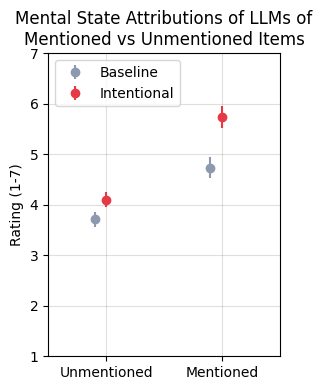

In [ ]:
condition = "intentional"
plot_type = "pointplot"
orientation = "vertical"
temp_conditions = ["Baseline", "Intentional"]

semantic_categories_path = os.path.join(semantic_analysis_data_dir, 'groupings_semantic.json')
semantic_R_results_path = os.path.join(semantic_analysis_save_dir, 'R_results', '{}_results.txt'.format(condition))

semantic_groupings = utils.read_file(semantic_categories_path)
groups = list(semantic_groupings[condition].keys())

if not os.path.exists(semantic_R_results_path):
    raise ValueError("Path to R results file {} does not exist".format(semantic_R_results_path))


emmeans_graph_data, emmeans_df = analysis.read_emmeans_marginalized_result(
    results_path=semantic_R_results_path,
    grouping_source="semantic",
    conditions=temp_conditions,
    marginalized_var='group',
    marginalized_var_values=groups,
    save_dir=semantic_analysis_graph_save_dir,
    overwrite=True
)

title = 'Mental State Attributions of LLMs of\nMentioned vs Unmentioned Items'
if plot_type == "bargraph":
    analysis.grouped_bar_graphs(
            groups=groups,
            grouping_source=condition,
            conditions=temp_conditions,
            graph_data=emmeans_graph_data,
            ci_dim='both',
            jitter_dim=None,
            line_start=None,
            color_idxs=[7, 4],
            fig_size=(3.5, 4),
            title=title,
            save_dir=semantic_analysis_graph_save_dir,
            filename="intentional",
            save_ext=save_ext
        )
elif plot_type == "pointplot":
    pivot_df = analysis._format_and_pivot_emmeans_df(
        emmeans_df=emmeans_df,
        target_column='group'
    )
    
    means = pivot_df[["mean-{}".format(condition) for condition in temp_conditions]].to_numpy().T
    errors = pivot_df[["ci_error-{}".format(condition) for condition in temp_conditions]].to_numpy().T
    labels = temp_conditions

    # Flip order to put unmentioned first
    means = np.flip(means, axis=1)
    errors = np.flip(errors, axis=1)
    # labels.reverse()

    if orientation == 'horizontal':
        ytick_labels = [label.capitalize() for label in pivot_df['group'].to_list()]
        ytick_labels.reverse()
        # ylabel = 'Item Categories'
        ylabel = None
        xtick_labels = [i for i in range(1, 8)]
        xlabel = 'Rating (1-7)'
        fig_size = (7, 3)

    else:
        xtick_labels = [label.capitalize() for label in pivot_df['group'].to_list()]
        xtick_labels.reverse()
        # xlabel = 'Item Categories'
        xlabel = None
        ytick_labels = [i for i in range(1, 8)]
        ylabel = 'Rating (1-7)'
        fig_size = (3, 4)
        xlim = (-0.5, 1.5)
        ylim = None

    fig_save_path = os.path.join(
        semantic_analysis_graph_save_dir,
        'mentioneditems_{}.{}'.format(orientation, save_ext))
    fig, ax = visualizations.pointplot(
        means=means,
        errors=errors,
        orientation=orientation,
        labels=labels,
        ytick_labels=ytick_labels,
        xtick_labels=xtick_labels,
        xlabel=xlabel,
        ylabel=ylabel,
        ylim=ylim,
        xlim=xlim,
        title=title,
        legend_loc='upper left',
        fig_size=fig_size,
        color_idxs=[7, 4], # Copied from analysis.ipynb > Make save_dirs
        marker_size=10,
        show_grid=True,
        save_path=fig_save_path,
        show=True)
else:
    raise ValueError("plot_type {} not recognized".format(plot_type))

